# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Итак, исходя из задачи и цели, приступаем к обработке

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv')
print (df.head(5))

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

Из увиденного  делаем вывод, что разделителем в дата сете является символ /t


In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Теперь похоже на "правду".
Не принципиально, но для "стиля" можем исправить написание название столбца "cityCenters_nearest" в привычном, змеином стиле

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Проверяем сделанное:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Из общей информации о таблице видно, что:

* first_day_exposition - тип object, а должен быть тип datetime; 
* ceiling_height - есть нулевые значения; 
* floors_total - должен быть тип int, есть нулевые значения. (int потому что кол-во этажей - это целое число);
* living_area - есть нулевые значения; 
* is_apartment - должен быть тип bool, есть нулевые значения; 
* kitchen_area - есть нулевые значения; 
* balcony - есть нулевые значения; 
* locality_name - есть нулевые значения; 
* airports_nearest - есть нулевые значения; 
* city_centers_nearest - есть нулевые значения; 
* parks_around3000 - тип должен быть int, есть нулевые значения; 
* parks_nearest - есть нулевые значения; 
* ponds_around3000 - тип должен быть int, есть нулевые значения; 
* ponds_nearest - есть нулевые значения; 
* days_exposition - тип должен быть int, есть нулевые значения.

#### Построим общую гистограмму для всех числовых столбцов таблицы, размерами 15 на 20

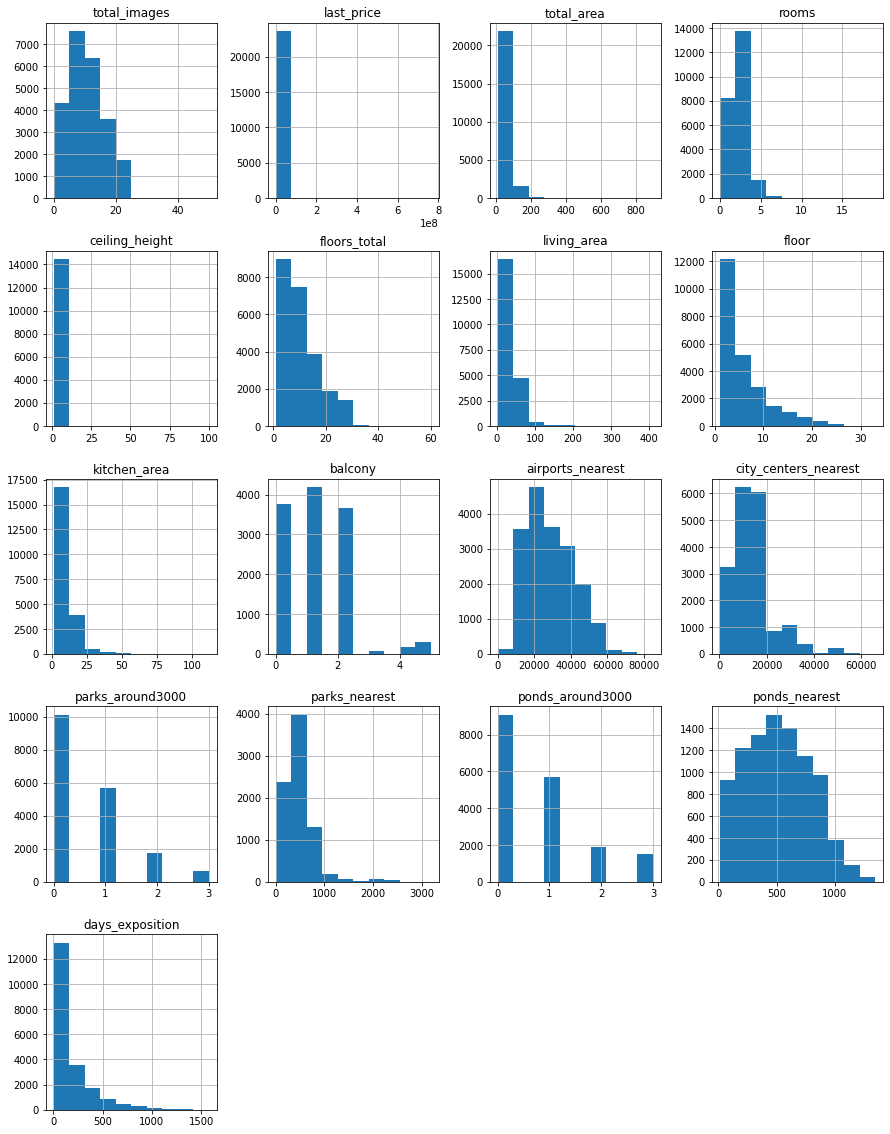

In [6]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

#### Приступим к самой первоначальной проблеме: поиск и устранение пропущенных значений.
##### Для этого посчитаем их долю в каждом столбце:


In [7]:
print (data.isna().sum())
print()
print ((data.isna().mean()*100))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment        

Ну что ж, несколько столбцов вызывают пристальное внимание к ним, по этому заполним пропущенные значения там, где это возможно

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

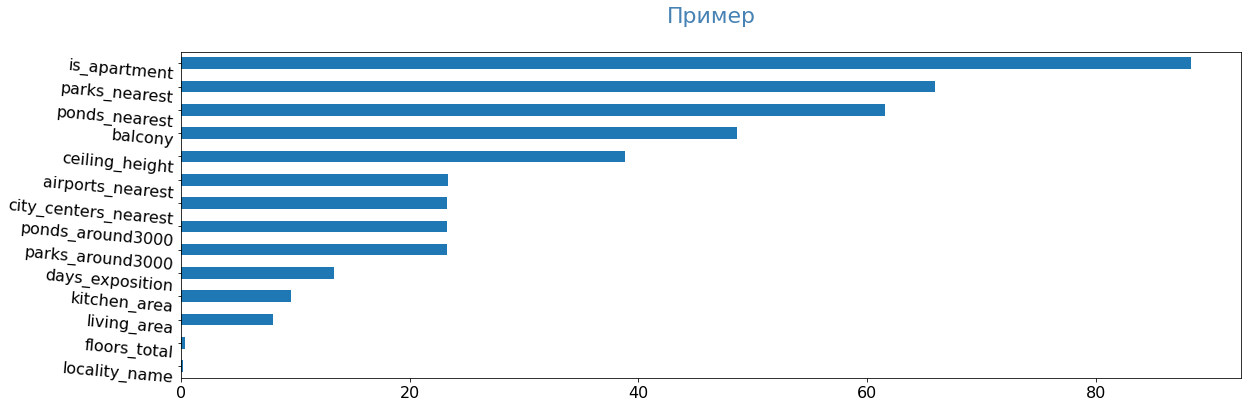

In [9]:
pass_value_barh(data)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br /> Наглядность представления информации одна из важных составляющих работы дата-аналитика или дата-сайентиста
    
мой график оформлен не совсем корректно, сможешь отметить, что стоило бы исправить в графике?
  

Так как данные взяты из сервиса Яндекс.Недвижимость, а точнее архив объявлений, то смею предположить что отсуствие значений в столбце "балкон" - это отсутвие балкона, а значит для правильности дальнейших расчетов, можем заменить пропуски на "0"

In [10]:
data.loc[data['balcony'].isnull(), 'balcony'] = 0
# print (data['balcony'].head(15)) - проверил для себя

С балконами разобрались, переходим далее

In [11]:
print(data['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


Будет не лишним удалить строки, где количество комнат указано как 0, так как их количество менее 1%

In [12]:
data.drop(data[data['rooms'] == 0].index, inplace=True)

Таким же образом поступим с квартирами, где не указана этажность, но перед этим узнаем количество апартаментов, что бы при замене проверить, как изменится ситуация

In [13]:
print(data['is_apartment'].value_counts())

False    2719
True       50
Name: is_apartment, dtype: int64


Запомнили значения

In [14]:
data.drop(data[data['floors_total'].isnull()].index, inplace=True)
print(data['is_apartment'].value_counts())

False    2719
True       50
Name: is_apartment, dtype: int64


Видим что количество не изменилось, значит все сделано верно.
Так как измениня выше не поменяли не чего, выясним уникальные значения в этом столбце

In [15]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Видим что есть значение nan. Смею предположить что там где не  указана информация - будем считать что это не аппартоменты 

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(0)
print(data['is_apartment'].value_counts())

0       23369
True       50
Name: is_apartment, dtype: int64


Теперь значения кажутся более правдивыми

Перейдем к стобцу "наименование локации"
Напомним себе сколько там пропусков

In [17]:
data['locality_name'].isna().sum()

48

Это так же менее 1% от общего количества (в самом начале определил сколько процентов пропусков в каждом столбце)
Удалим строки без указания наименования локации

In [18]:
data = data.dropna(subset=['locality_name'])
# data['locality_name'].isna().sum() - проверил себя

Так же преведем время в стобце first_day_exposition в "человеческий" формат

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Заполним пропуски в комнатах: кухня; жилая прощадь, общая облощадь.
Заполнять будем на медианнное значение каждой категории, так как это логично

In [20]:
for rooms in data['rooms'].unique():
    #Заполняем пропуски в общей площади
    data.loc[(data['total_area'].isna()) & (data['rooms'] == rooms), 'total_area'] = \
    data[data['rooms'] == rooms]['total_area'].median()
    #Заполняем пропуски в площади кухни
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == rooms), 'kitchen_area'] = \
    data[data['rooms'] == rooms]['kitchen_area'].median()

#Заполняем пропуски в жилой площади (примем, что нежилая площадь квартиры равна 2 площадям кухни)
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] - \
                                                        2* data.loc[data['living_area'].isna(), 'kitchen_area']
data['living_area'] = data['living_area'].abs()    
print('Средняя площадь кухни', data['kitchen_area'].median())
print('Средняя жилая площадь', data['living_area'].median())
print('Средняя общая площадь', data['total_area'].median())

Средняя площадь кухни 9.0
Средняя жилая площадь 30.2
Средняя общая площадь 52.0


In [21]:
display ((data['total_area']*0.9 <= data['living_area'] + data['kitchen_area']).sum())

838

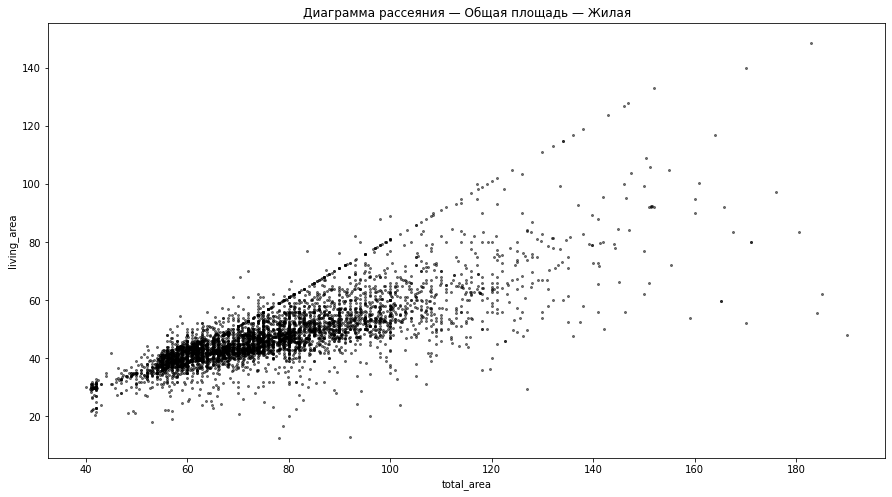

In [22]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

Теперь же избавимся от пропусков в других значениях

In [23]:
for location in data['locality_name'].unique():
    data.loc[(data['locality_name'] == location) & (data['airports_nearest'].isna()),'airports_nearest' ] \
                        =  data.loc[data['locality_name'] == location, 'airports_nearest'].mean()
    
    data.loc[(data['locality_name'] == location) & (data['parks_around3000'].isna()),'parks_around3000' ] \
                        =  data.loc[data['locality_name'] == location, 'parks_around3000'].mean()
    
    data.loc[(data['locality_name'] == location) & (data['ponds_around3000'].isna()),'ponds_around3000' ] \
                        =  data.loc[data['locality_name'] == location, 'ponds_around3000'].mean()
    

Проверяем, что у нас получилось

In [24]:
print (data.isna().sum())
print()
print ((data.isna().mean()*100))

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8972
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5356
city_centers_nearest     5424
parks_around3000         5356
parks_nearest           15369
ponds_around3000         5356
ponds_nearest           14403
days_exposition          3157
dtype: int64

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.389457
floors_total             0.000000
living_area              0.000000
floor                    0.000000
is_apartment        

Замена пропусков на этом завершена

#### Приступаем к поиску дубликатов

In [25]:
data.duplicated().sum()

0

Отлично, явных дупликатов нет, переходим к неявным

In [26]:
data = data.sort_values(by='locality_name')
data['locality_name'].unique()    

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Видим неявные дубликаты... жаль, думал и тут будет 0...
устроняем

In [27]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')
data['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'посёлок городского типа Большая Ижора',
       'посёлок городского типа Янино-1',
       'посёлок городского типа Будогощь',
       'посёлок городского типа Виллози',
       'посёлок городского типа Лесогорский',
       'посёлок городского типа Мга', 'посёлок городского типа Назия',
       'посёлок городского типа Новоселье',
       'посёлок городского типа Павлово',
       'посёлок 

Возможно еще где то пропустил дубликаты, но в данный момент их не вижу.

In [28]:
# check
data.locality_name.nunique()

321

#### Перейдем к оснвным параметрам квартир, но для начала уберем редкие и выбивающиеся значения

In [29]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition', 'living_area', 'kitchen_area', 'floors_total']].describe()

,total_area,last_price,rooms,ceiling_height,days_exposition,living_area,kitchen_area,floors_total
count,23371.000000,2.337100e+04,23371.000000,14399.000000,20214.000000,23371.000000,23371.000000,23371.000000
mean,60.580161,6.566584e+06,2.087844,2.769387,181.368458,35.260881,10.454371,10.624235
std,35.613640,1.094248e+07,1.066362,1.249022,220.094368,24.277927,5.665974,6.567545
min,12.000000,1.219000e+04,1.000000,1.000000,1.000000,0.000000,1.300000,1.000000
25%,40.200000,3.450000e+06,1.000000,2.510000,45.000000,19.000000,7.300000,5.000000
50%,52.000000,4.650000e+06,2.000000,2.650000,96.000000,30.200000,9.000000,9.000000
75%,70.000000,6.800000e+06,3.000000,2.800000,232.000000,43.000000,11.500000,16.000000
max,900.000000,7.630000e+08,19.000000,100.000000,1580.000000,511.000000,112.000000,60.000000


In [30]:
data['total_area'].describe()

count    23371.000000
mean        60.580161
std         35.613640
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

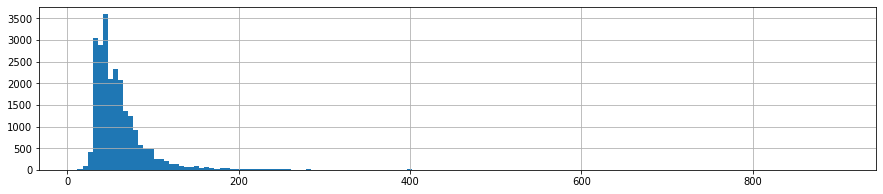

In [31]:
data.total_area.hist(bins = 150, figsize = (15,3));

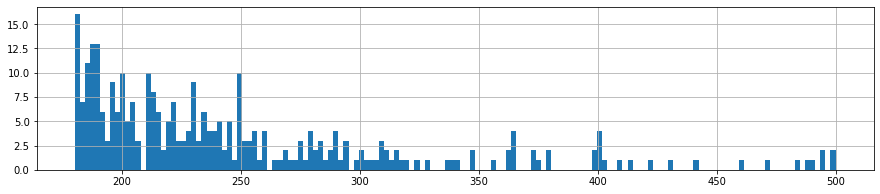

In [32]:
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

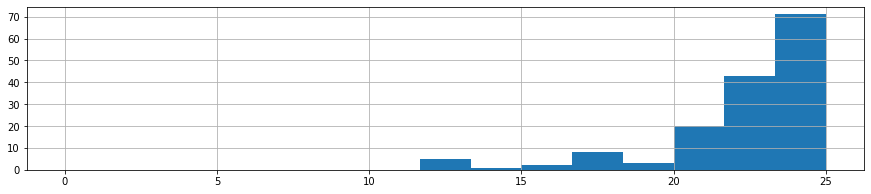

In [33]:
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

Делаем вывод, что необходимо убрать все что ниже 20 кв. м и больше 250 кв. м, но перед всеми операциями обязательно проверяем количество потерь

In [34]:
data.shape[0]

23371

In [35]:
data = data.query('total_area.isna() |  (total_area >= 20 & total_area <= 250)')

In [36]:
data.shape[0]

23242

In [37]:
data['days_exposition'].describe()

count    20108.000000
mean       180.892680
std        219.491596
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

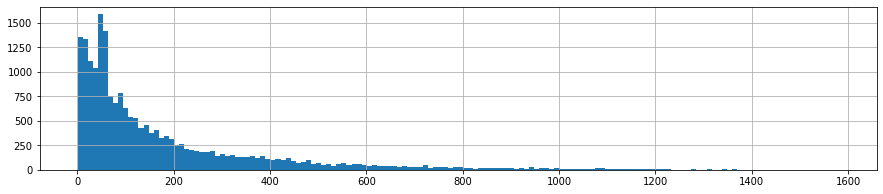

In [38]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

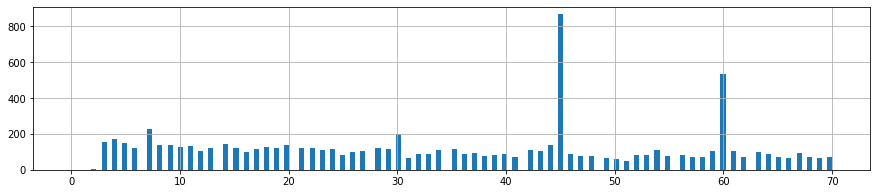

In [39]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range=(0,70));

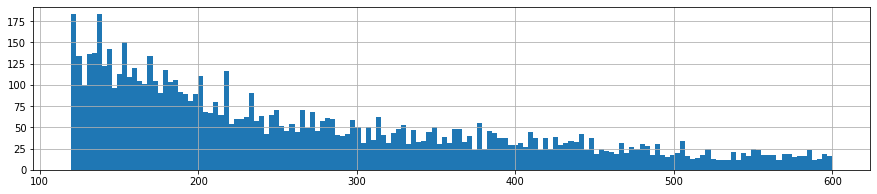

In [40]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range=(120,600));

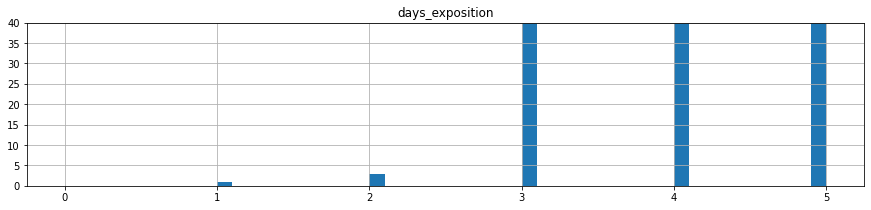

In [41]:
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

Начинает от 3 и так как данный столбец имеет очень длинный "хвост" обризаем в границе 0,90 квантели, т.е. 1200

In [42]:
data.shape[0]

23242

In [43]:
data = data.query('days_exposition.isna() |  (days_exposition >= 3 & days_exposition <= 1200)')


In [44]:
data.shape[0]

23150

In [45]:
data['rooms'].describe()

count    23150.000000
mean         2.067473
std          1.014871
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

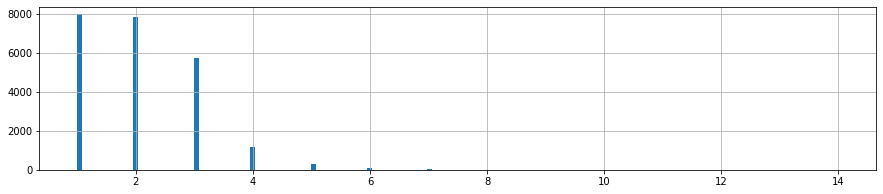

In [46]:
data.rooms.hist(bins = 150, figsize = (15,3));

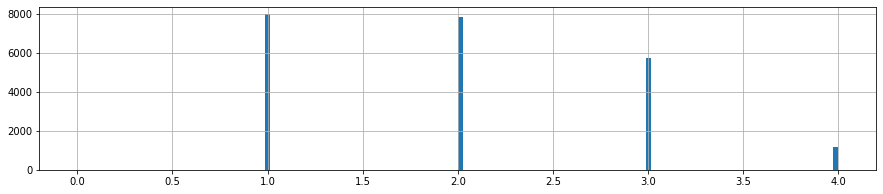

In [47]:
data.rooms.hist(bins = 150, figsize = (15,3), range = (0,4));

(0.0, 40.0)

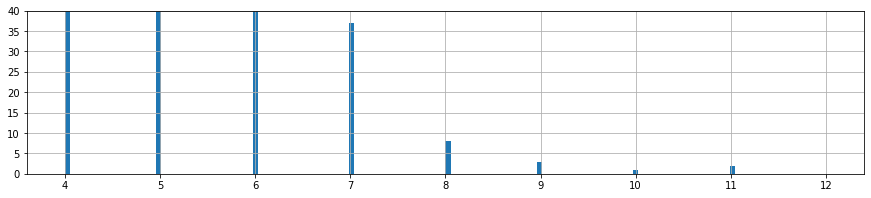

In [48]:
data.rooms.hist(bins = 150, figsize = (15,3), range = (4,12));
plt.ylim(0, 40)

Делаем вывод из данных гистограмм что "обризать" в начале у нас не чего (счет идет с 1), и только в конце можно отрезать на 8-комнатных квартирах через логическое уровнение но перед этим обязательно проверим сколько данных потеряем.

In [49]:
data.shape[0]

23150

In [50]:
data = data.query('rooms.isna() | (rooms < 8)')

In [51]:
data.shape[0]

23135

In [52]:
data['ceiling_height'].describe()

count    14239.000000
mean         2.764884
std          1.253910
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

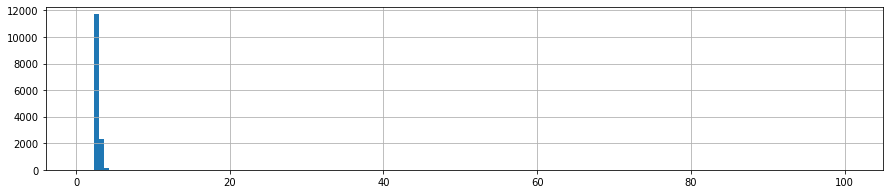

In [53]:
data.ceiling_height.hist(bins = 150, figsize = (15,3));

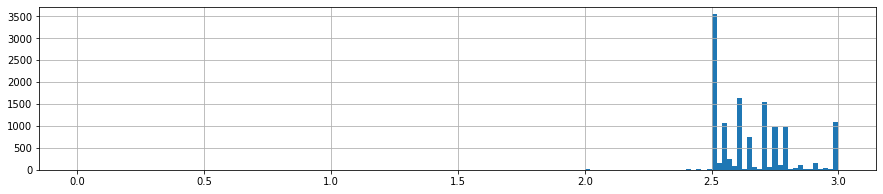

In [54]:
data.ceiling_height.hist(bins = 150, figsize = (15,3), range = (0,3));

(0.0, 50.0)

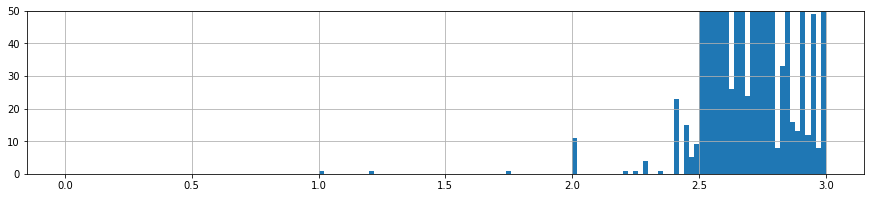

In [55]:
data.ceiling_height.hist(bins = 150, figsize = (15,3), range = (0,3));
plt.ylim(0, 50)

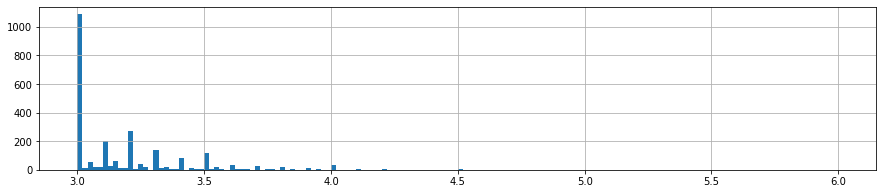

In [56]:
data.ceiling_height.hist(bins = 150, figsize = (15,3), range = (3,6));

(0.0, 50.0)

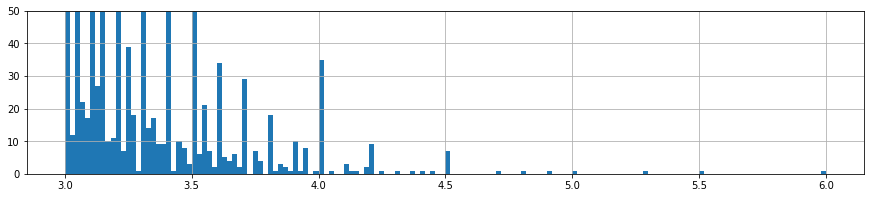

In [57]:
data.ceiling_height.hist(bins = 150, figsize = (15,3), range = (3,6));
plt.ylim(0, 50)

Опираясь на данные гистограмм, смело можем отризать все что до 2,5 метров и выше 4. 

In [58]:
data.shape[0]

23135

In [59]:
data = data.query('ceiling_height.isna() |  (ceiling_height >= 2.5 & ceiling_height <= 4)')

In [60]:
data.shape[0]

22998

In [61]:
data['last_price'].describe()

count    2.299800e+04
mean     6.179485e+06
std      6.936434e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

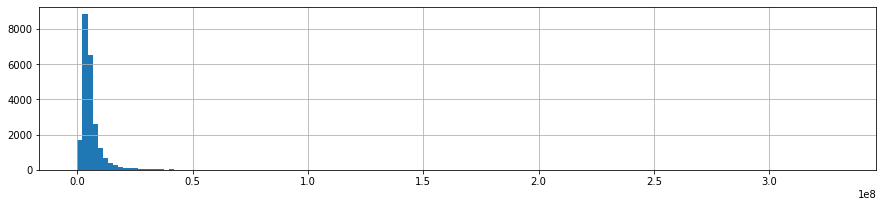

In [62]:
data.last_price.hist(bins = 150, figsize = (15,3));

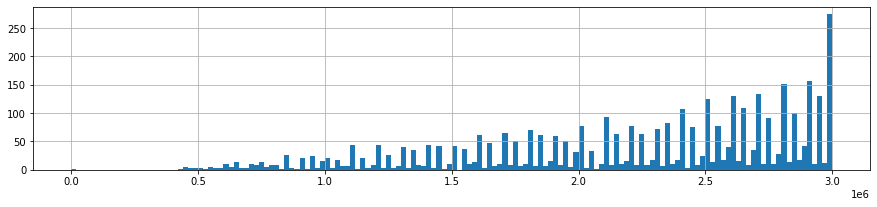

In [63]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (0,3000000));

(0.0, 100.0)

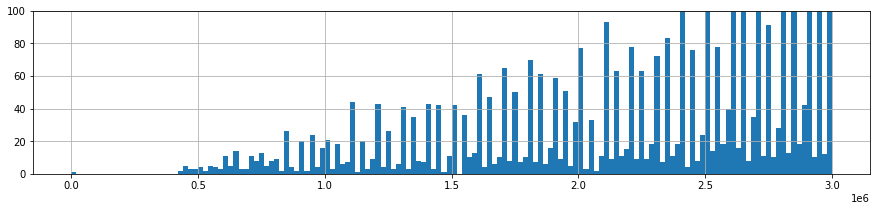

In [64]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (0,3000000));
plt.ylim(0, 100)

(0.0, 100.0)

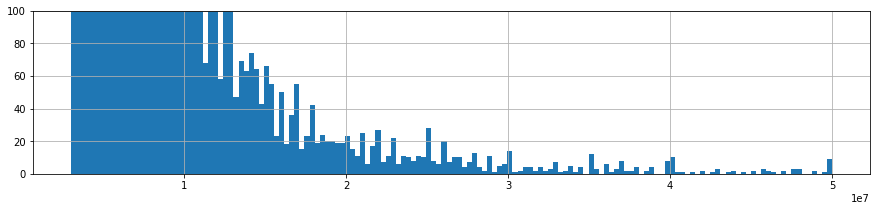

In [65]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (3000000, 50000000));
plt.ylim(0, 100)

Судя по гистограммам и значениям describe() можно сделать вывод, что обрезать надо все что ниже 800 000 и выше 30 000 000 примерно. Но перед этим обязательно проверим "потери".

In [66]:
data.shape[0]

22998

In [67]:
data = data.query('last_price.isna() |  (last_price >= 800000 & last_price <= 30000000)')

In [68]:
data.shape[0]

22663

In [69]:
data['living_area'].describe()

count    22663.000000
mean        33.731296
std         18.420755
min          2.000000
25%         18.800000
50%         30.000000
75%         42.200000
max        217.860000
Name: living_area, dtype: float64

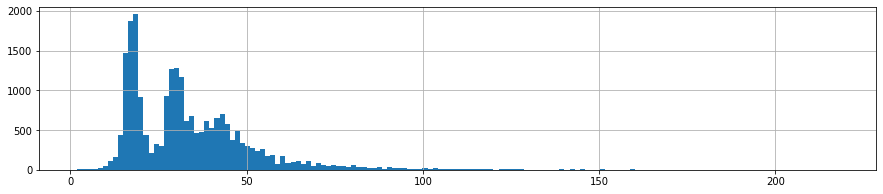

In [70]:
data.living_area.hist(bins = 150, figsize = (15,3));

(0.0, 100.0)

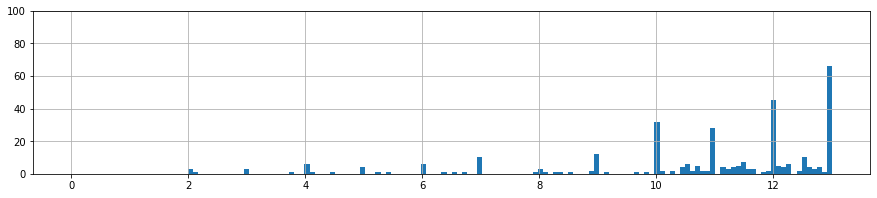

In [71]:
data.living_area.hist(bins = 150, figsize = (15,3), range=(0,13));
plt.ylim(0, 100)

(0.0, 100.0)

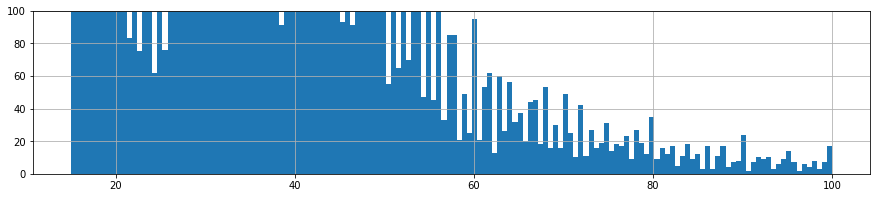

In [72]:
data.living_area.hist(bins = 150, figsize = (15,3), range=(15,100));
plt.ylim(0, 100)

Мое предположение по обрезке все что до 10 кв.м и все что выше 80 кв.м.


In [73]:
data.shape[0]

22663

In [74]:
data = data.query('living_area.isna() |  (living_area >= 10 & living_area <= 100)')

In [75]:
data.shape[0]

22361

In [76]:
data['kitchen_area'].describe()

count    22361.00000
mean        10.12705
std          4.75606
min          1.30000
25%          7.20000
50%          9.00000
75%         11.20000
max         70.00000
Name: kitchen_area, dtype: float64

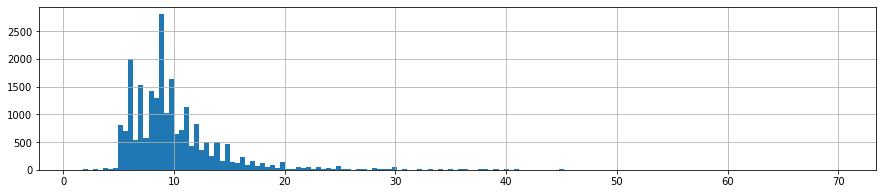

In [77]:
data.kitchen_area.hist(bins = 150, figsize = (15,3));

(0.0, 100.0)

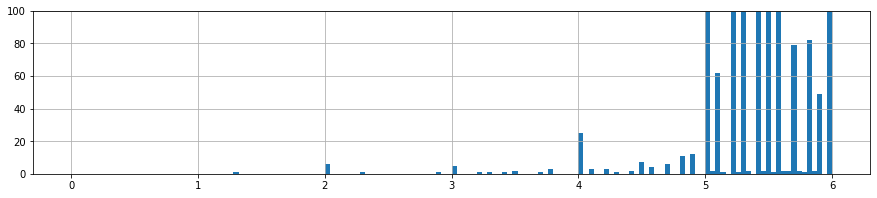

In [78]:
data.kitchen_area.hist(bins = 150, figsize = (15,3), range=(0,6));
plt.ylim(0, 100)

(0.0, 100.0)

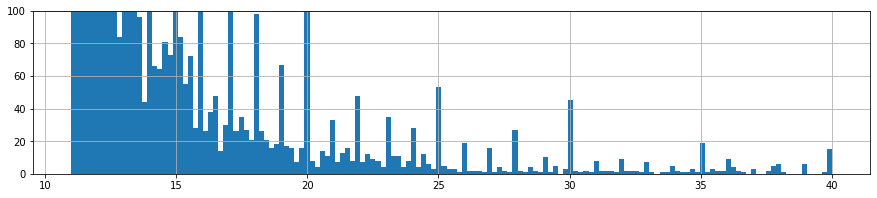

In [79]:
data.kitchen_area.hist(bins = 150, figsize = (15,3), range=(11,40));
plt.ylim(0, 100)

Обризаем все что до 5 и свыше 30


In [80]:
data.shape[0]

22361

In [81]:
data = data.query('living_area.isna() |  (kitchen_area >= 5 & kitchen_area <= 30)')

In [82]:
data.shape[0]

22058

In [83]:
data['floors_total'].describe()

count    22058.000000
mean        10.773506
std          6.593346
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

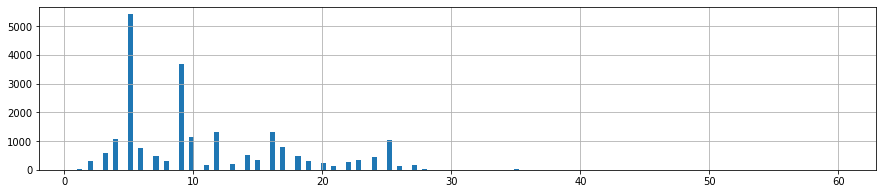

In [84]:
data.floors_total.hist(bins = 150, figsize = (15,3));

(0.0, 100.0)

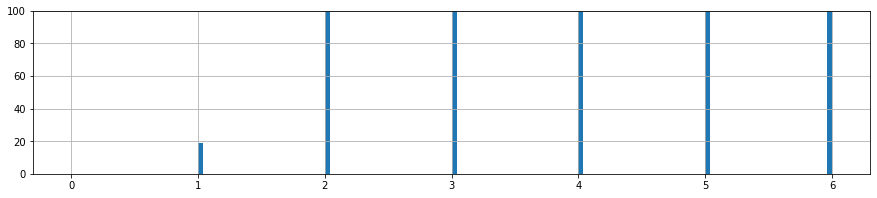

In [85]:
data.floors_total.hist(bins = 150, figsize = (15,3), range=(0,6));
plt.ylim(0, 100)

(0.0, 100.0)

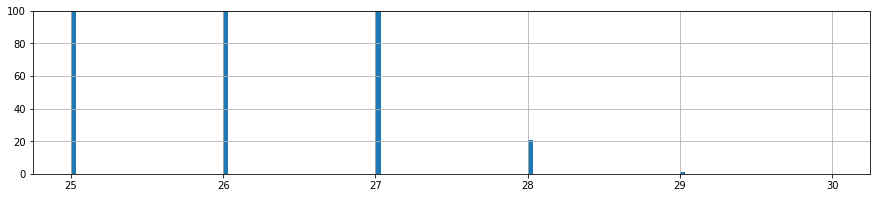

In [86]:
data.floors_total.hist(bins = 150, figsize = (15,3), range=(25,30));
plt.ylim(0, 100)

Предлагаю отрезать все что выше 27 этажа с первым этажом включительно. 


In [87]:
data.shape[0]

22058

In [88]:
data = data.query('floors_total.isna() |  (floors_total > 1 & floors_total <= 27)')

In [89]:
data.shape[0]

21989

На этом этапе закончим фильтрацию данных. От изначальных 23371 строк, нам удалось сохранить 21989. Потери составили  


In [90]:
poteri = 21989/23371*100
print ('Потери при обработке данных составили', round(100 - poteri, 2), '%')

Потери при обработке данных составили 5.91 %


Так же поменяем тип данных в столбцах


In [91]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['last_price'] = data['last_price'].astype('int')

Посмотрим на окончательный вид данных после предобработки


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21989 entries, 18807 to 15459
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21989 non-null  int64         
 1   last_price            21989 non-null  int64         
 2   total_area            21989 non-null  float64       
 3   first_day_exposition  21989 non-null  datetime64[ns]
 4   rooms                 21989 non-null  int64         
 5   ceiling_height        13486 non-null  float64       
 6   floors_total          21989 non-null  int64         
 7   living_area           21989 non-null  float64       
 8   floor                 21989 non-null  int64         
 9   is_apartment          21989 non-null  object        
 10  studio                21989 non-null  bool          
 11  open_plan             21989 non-null  bool          
 12  kitchen_area          21989 non-null  float64       
 13  balcony     

* Вывод:
В процессе предобработки данных заменил строковый формат на дату, убрали строки с пустыми значениями, которые не повлияют на дальнешие расчеты. Пропуски в значениях общей площади заменили медианными. Разобрались с аномальными значениями. После этого производить анализ станет легче, результаты будут точнее, а выводы корректнее.

#### check gap

In [93]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [94]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


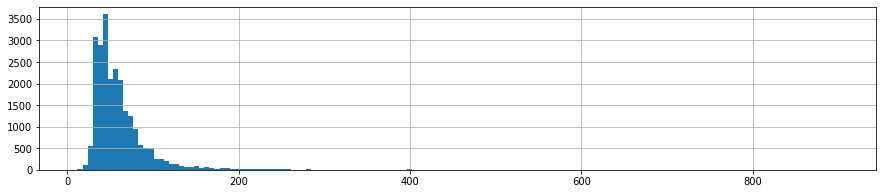

In [95]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

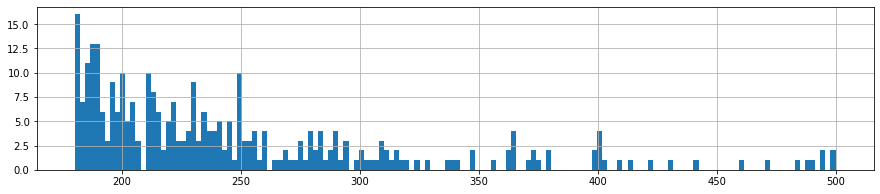

In [96]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

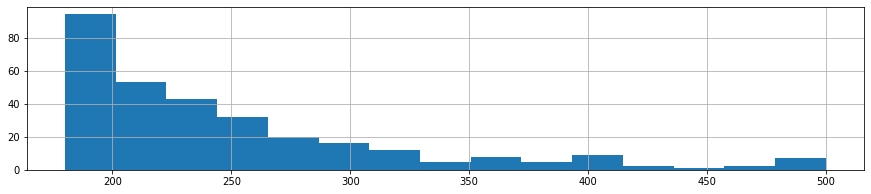

In [97]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

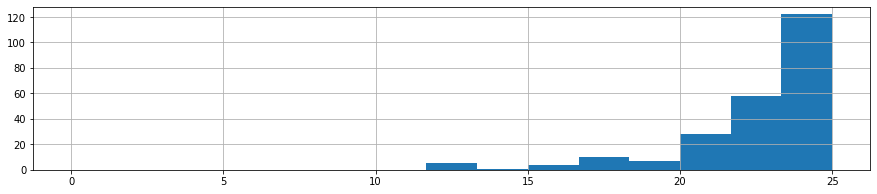

In [98]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [99]:
df_check['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

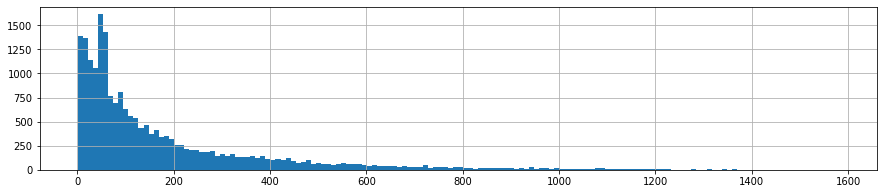

In [100]:
df_check.days_exposition.hist(bins = 150, figsize = (15,3));

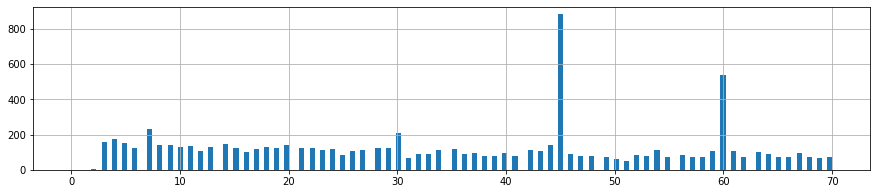

In [101]:
df_check.days_exposition.hist(bins = 150, figsize = (15,3), range=(0,70));

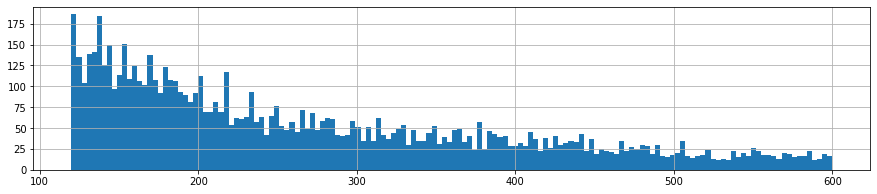

In [102]:
df_check.days_exposition.hist(bins = 150, figsize = (15,3), range=(120,600));

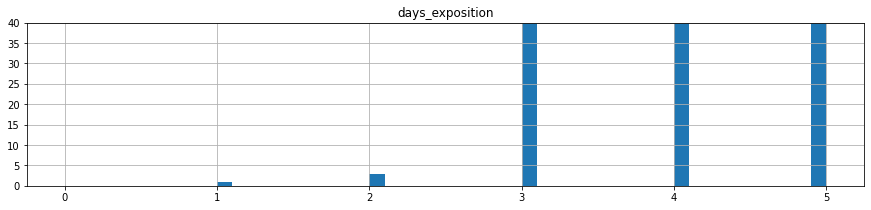

In [103]:

df_check.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [104]:
data.shape[0]

21989

In [105]:
data[['days_exposition']].describe()

,days_exposition
count,19128.000000
mean,173.328367
std,203.785384
min,3.000000
25%,44.000000
50%,93.000000
75%,224.000000
max,1200.000000


In [106]:
data['days_exposition'].shape[0]

21989

In [107]:
data = data.query('days_exposition.isna() |  (days_exposition >= 3 & days_exposition <= 1200)')


In [108]:
data['days_exposition'].shape[0]

21989

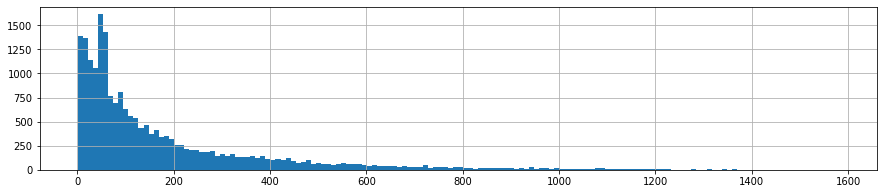

In [109]:
df_check.days_exposition.hist(bins = 150, figsize = (15,3));

In [110]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,22.33,2.50,3.00,"850,000.00",10.00,5.00,1.00,2.00
0.01,1.00,28.30,2.50,4.00,"1,150,000.00",13.00,5.00,1.00,2.00
0.5,2.00,51.20,2.65,93.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,4.00,133.41,3.56,974.00,"19,953,600.00",84.51,24.70,22.00,26.00
0.9988,5.00,171.61,4.00,"1,161.00","27,974,396.16",98.12,30.00,25.61,27.00


In [111]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,989.00","21,989.00","13,486.00","19,128.00","21,989.00","21,989.00","21,989.00","21,989.00","21,989.00"
min,1.00,20.00,2.50,3.00,"800,000.00",10.00,5.00,1.00,2.00
max,7.00,236.00,4.00,"1,200.00","30,000,000.00",100.00,30.00,27.00,27.00


### Посчитайте и добавьте в таблицу новые столбцы

#### Найдем цену одного квадратного метра

In [112]:
data['price_meter'] = data['last_price'] / data['total_area']
data['price_meter'] = data['price_meter'].round(decimals=2)

#### Так же расчитаем и добавим в таблицу день, месяц и год публикации:

In [113]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month']  = data['first_day_exposition'].dt.month    
data['year'] = data['first_day_exposition'].dt.year

#### Так же добавим в таблицу классификацию этажей (значения — «‎первый», «последний», «другой»)

In [114]:
def new_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        return 'нет информации'
data['new_floor'] = data.apply(new_floor, axis = 1)  
data['new_floor'].value_counts()

другой       16233
последний     3033
первый        2723
Name: new_floor, dtype: int64

#### Ну и последнее, расстояние до центра города в километрах:

In [115]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000, 0)

* Проверим, что получилось:

In [116]:
display (data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,new_floor,city_centers_nearest_km
18807,12,1500000,78.0,2017-09-07,3,2.8,4,59.0,3,False,...,NaN,NaN,NaN,45.0,19230.77,3,9,2017,другой,NaN
764,4,950000,44.0,2018-05-05,2,NaN,5,32.0,2,0,...,NaN,NaN,NaN,156.0,21590.91,5,5,2018,другой,NaN
3010,6,850000,48.0,2016-03-11,2,NaN,5,30.6,5,0,...,NaN,NaN,NaN,174.0,17708.33,4,3,2016,последний,NaN
638,6,980000,47.1,2019-04-12,2,NaN,3,29.0,3,0,...,NaN,NaN,NaN,NaN,20806.79,4,4,2019,последний,NaN
3731,10,1310000,65.6,2019-02-22,3,NaN,5,42.0,4,0,...,NaN,NaN,NaN,NaN,19969.51,4,2,2019,другой,NaN
19186,8,970000,61.5,2018-04-04,3,NaN,5,47.4,1,0,...,NaN,NaN,NaN,273.0,15772.36,2,4,2018,первый,NaN
5821,7,820000,51.0,2017-12-09,2,NaN,5,32.0,5,0,...,NaN,NaN,NaN,130.0,16078.43,5,12,2017,последний,NaN
1761,11,999000,62.0,2018-02-15,4,NaN,5,46.0,2,0,...,NaN,NaN,NaN,226.0,16112.90,3,2,2018,другой,NaN
22617,6,1430000,43.0,2017-11-24,2,2.5,4,23.0,2,0,...,NaN,NaN,NaN,28.0,33255.81,4,11,2017,другой,NaN
14423,4,1650000,55.0,2017-06-07,2,NaN,5,33.0,1,0,...,NaN,NaN,NaN,80.0,30000.00,2,6,2017,первый,NaN


### Проведите исследовательский анализ данных

#### Посмотрим на общую площадь

In [117]:
data['total_area'].describe()

count    21989.000000
mean        56.521211
std         22.719173
min         20.000000
25%         40.000000
50%         51.200000
75%         67.100000
max        236.000000
Name: total_area, dtype: float64

Посмотрим более наглядно на гистограмму 

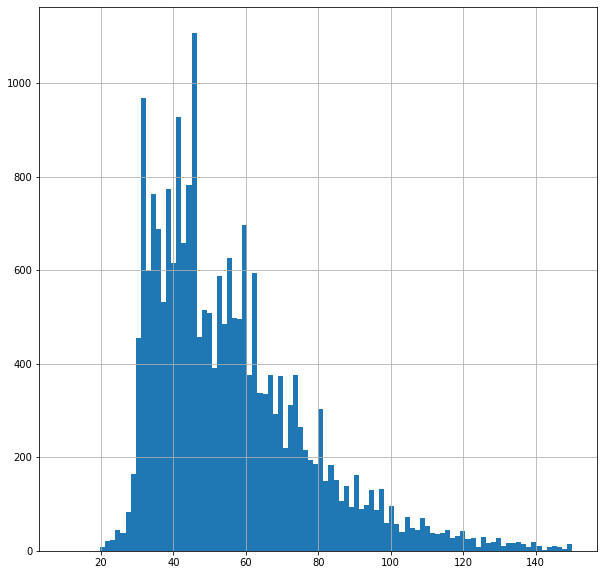

In [118]:
data['total_area'].hist(figsize=(10, 10) , bins=100, range=(10, 150))
plt.show();

Продают как маленькие квартиры (похоже это студии), так и очень большие (порядка 100 кв.м). Общая площадь продаваемых квартир по медиане равна 56 кв.м., а среднее значение 51 кв.м.

#### Жилая площадь

In [119]:
data['living_area'].describe()

count    21989.000000
mean        32.729273
std         15.665606
min         10.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        100.000000
Name: living_area, dtype: float64

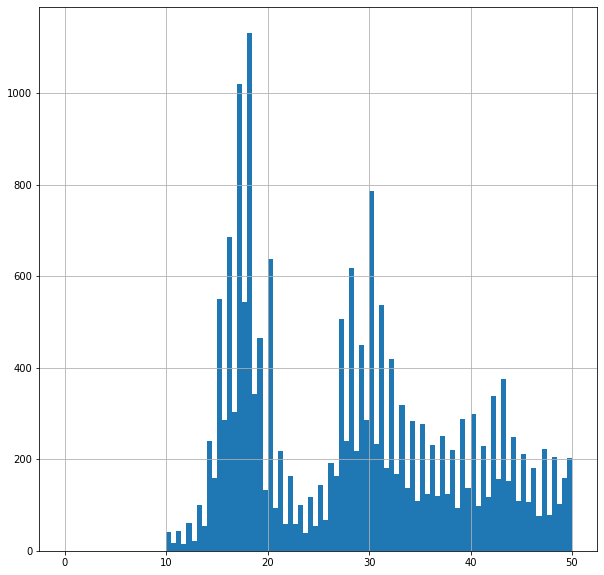

In [120]:
data['living_area'].hist(figsize=(10, 10) , bins=100, range=(0, 50))
plt.show()

Жилая площадь продаваемых квартир имеет 2 "пика": 15 кв.м и 32-33 кв.м. Среднее и медианное значение соответсвует второму пику, а первый пик соотвуетвует второй квантели.

#### Площадь кухни


In [121]:
data['kitchen_area'].describe()

count    21989.000000
mean         9.876568
std          3.803278
min          5.000000
25%          7.200000
50%          9.000000
75%         11.000000
max         30.000000
Name: kitchen_area, dtype: float64

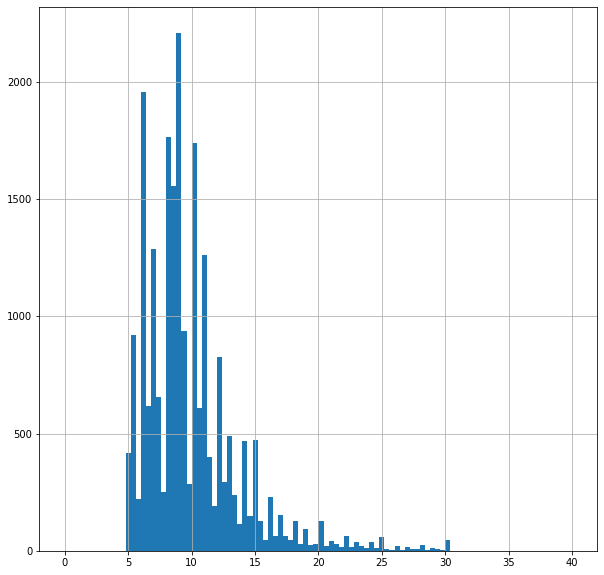

In [122]:
data['kitchen_area'].hist(figsize=(10, 10) , bins=100, range=(0, 40))
plt.show()

Пик площади кухни в продаваемых квартирах судя по графику  приходиться примерно на 8-9 кв.м. что соответствует как среднему значению так и медианному.

#### Цена объекта


In [123]:
data['last_price'].describe()

count    2.198900e+04
mean     5.521771e+06
std      3.514385e+06
min      8.000000e+05
25%      3.450000e+06
50%      4.600000e+06
75%      6.500000e+06
max      3.000000e+07
Name: last_price, dtype: float64

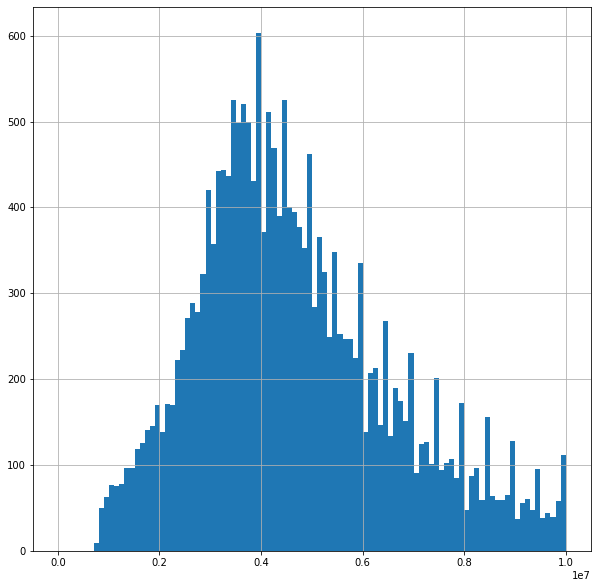

In [124]:
data['last_price'].hist(figsize=(10, 10) , bins=100, range=(1e+04, 1e+07))
plt.show()

Среднее значение отличается от медианного на почти 1 млн рублей, это скорей всего из-за длинного "хвоста". А в целом, цена в 4,5 млн. руб. до 5,5 млн рублей несколько лет назад выглядит "реалистичной".

#### Количество комнта

In [125]:
data['rooms'].describe()

count    21989.000000
mean         2.015417
std          0.935858
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

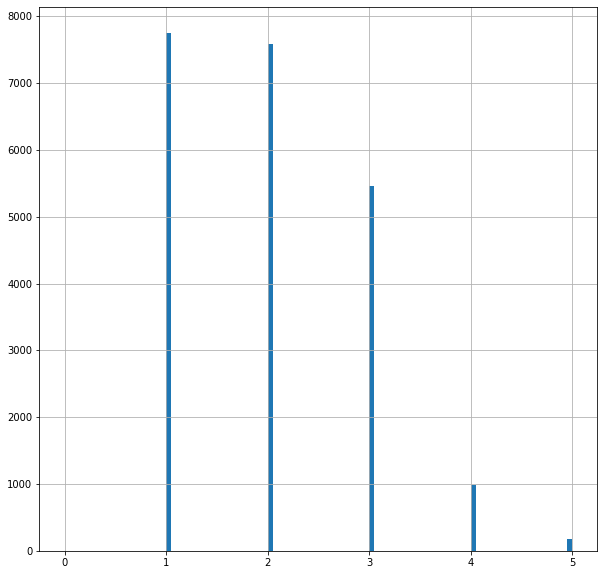

In [126]:
data['rooms'].hist(figsize=(10, 10) , bins=100, range=(0, 5))
plt.show()

Лидеры продаж без условно однокомнатные и двухкомнатные квартиры. Далее "трешки", ну и после с большим отстованием идут 4х-комнатые. 

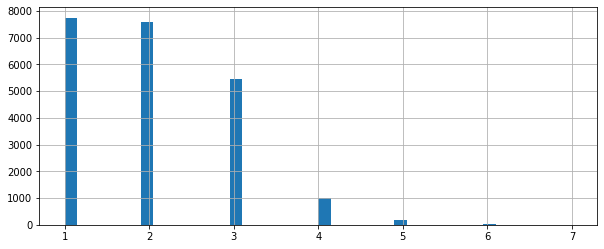

In [127]:
# check
data['rooms'].hist(figsize=(10, 4), bins=40)
plt.show()

#### Высота потолков:

In [128]:
data['ceiling_height'].describe()

count    13486.000000
mean         2.705957
std          0.239682
min          2.500000
25%          2.500000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

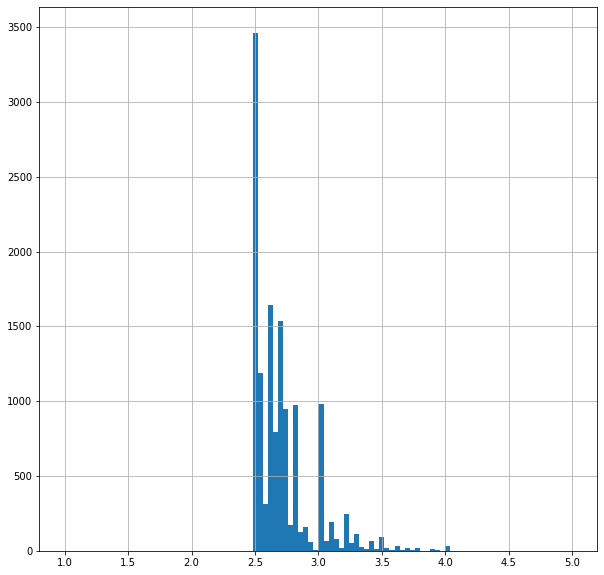

In [129]:
data['ceiling_height'].hist(figsize=(10, 10) , bins=100, range=(1, 5))
plt.show()

В основном, потолки в продаваемых квартирых высотой в 2,6м, далее видимо идут так называемые "сталинки" где потолки были от 3 до 4 метров. 

#### Этаж квартиры:

In [130]:
data['floor'].describe()

count    21989.000000
mean         5.884306
std          4.846318
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

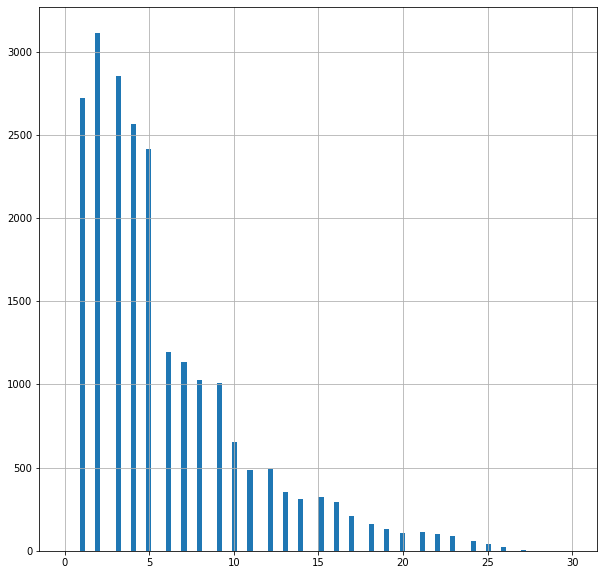

In [131]:
data['floor'].hist(figsize=(10, 10) , bins=100, range=(0, 30))
plt.show()

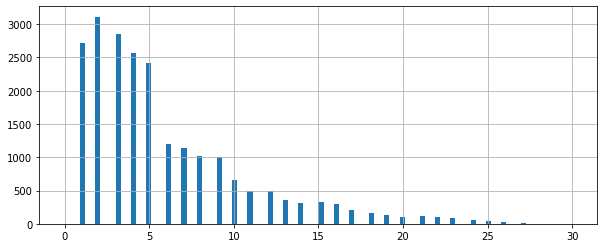

In [132]:
data['floor'].hist(figsize=(10, 4) , bins=100, range=(0, 30))
plt.show()

#### Тип этажа квартиры («первый», «последний», «другой»)

In [133]:
data['new_floor'].describe()

count      21989
unique         3
top       другой
freq       16233
Name: new_floor, dtype: object

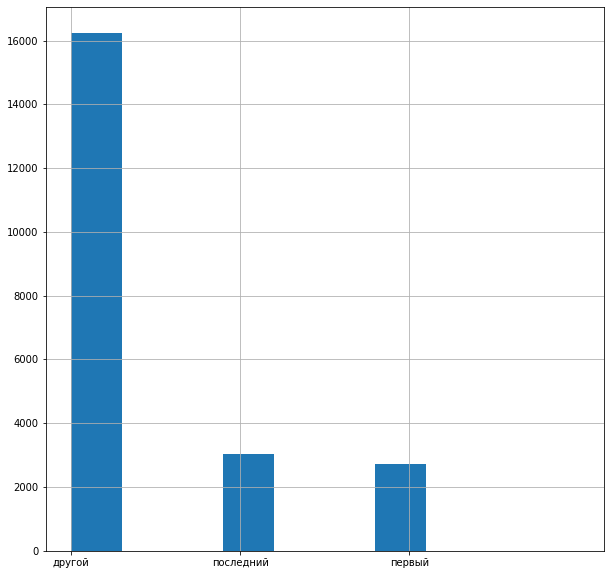

In [134]:
data['new_floor'].hist(figsize=(10, 10) , range=(0, 3))
plt.show()

Наглядная гистограмма,из которой видно что объявлений о продаже квартир на первом и последнем этажах меньше, чем на любых других этажах. Но это и не удивитоельно, ведь, "других" этажей в каждом доме гараздо больше.

#### Общее количество этажей в доме:

In [135]:
data['floors_total'].describe()

count    21989.000000
mean        10.731957
std          6.507395
min          2.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         27.000000
Name: floors_total, dtype: float64

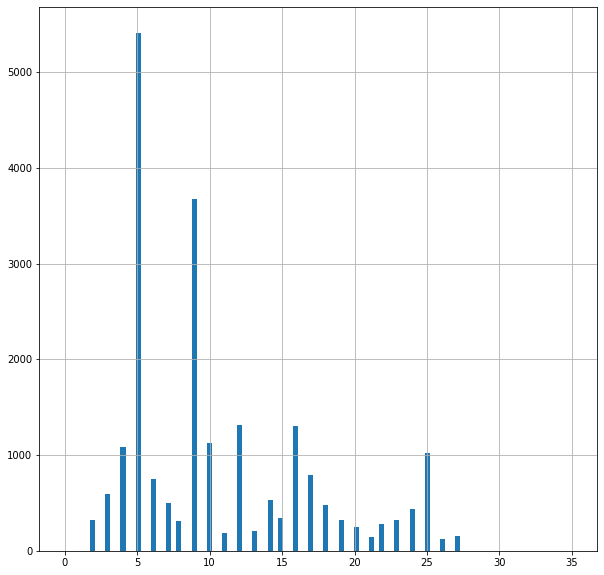

In [136]:
data['floors_total'].hist(figsize=(10, 10) , bins=100, range=(0, 35))
plt.show()

Из гистограммы видно, что большество домой в Питербурге это или 5-ти этажные, либо 9-ти этажные, скорей всего это старые дома. А 10, 12, 16 и 25 этажные дома это скорей всего уже "свежие" дома.

#### Расстояние до центра города в км

In [137]:
data['city_centers_nearest_km'].describe()

count    16836.000000
mean        14.508197
std          8.554686
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

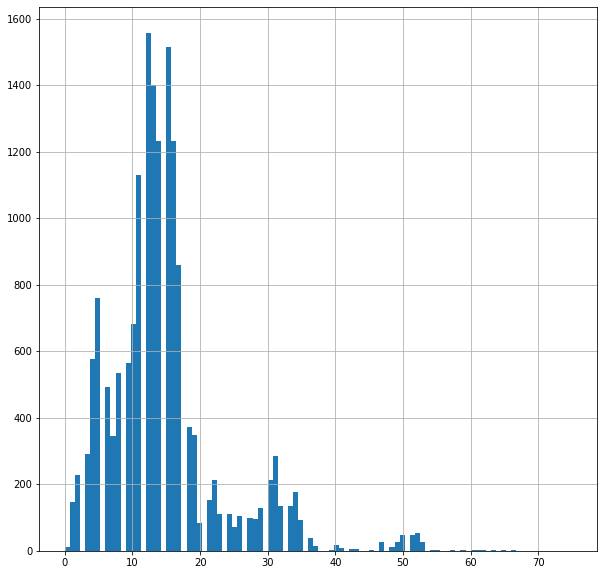

In [138]:
data['city_centers_nearest_km'].hist(figsize=(10, 10) , bins=100, range=(0, 75))
plt.show()

Самые частые объявления о продаже квартир на расстоянии 13 и 16 км от центра города. В целом это стандртное расстояния от большенства желищных комлексов в текущих реалях.

#### Расстояние до ближайшего аэропорта

In [139]:
data['airports_nearest'].describe()

count    16890.000000
mean     28907.347801
std      12746.304964
min          0.000000
25%      18410.000000
50%      27105.500000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

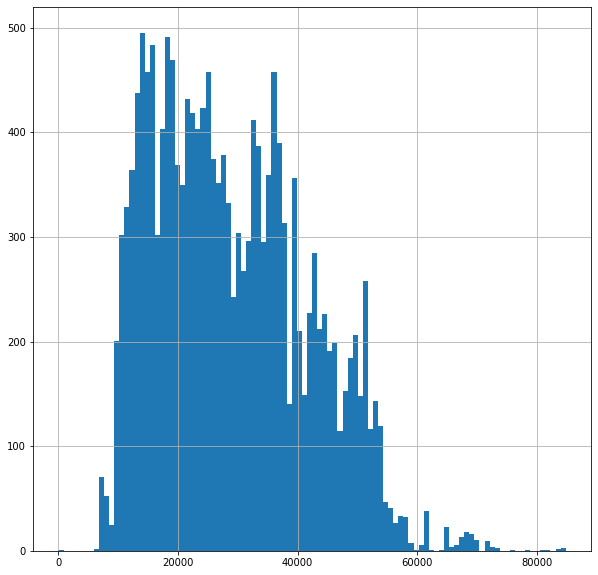

In [140]:
data['airports_nearest'].hist(figsize=(10, 10) , bins=100)
plt.show()

Видно, что большинство квартир распалагаются от аэропорта в расстоянии от 18км до 35км. что соответствует от первой квантели до третьей.

#### Расстояние до ближайшего парка

In [141]:
data['parks_around3000'].describe()

count    16890.000000
mean         0.587774
std          0.779501
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

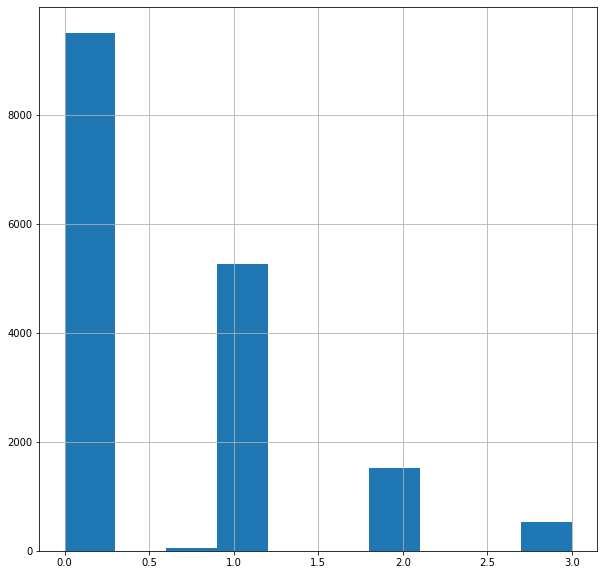

In [142]:
data['parks_around3000'].hist(figsize=(10, 10))
plt.show()

В большенстве рядом с квартирой парка не будет. Но не редки значения когда все же рядом будет 1 парк, ну а если не жаль времени на поиски и "деньги не проблема" то можно найти и 3 парка сразу.

#### День публикации объявления

In [143]:
data['weekday'].describe()

count    21989.000000
mean         2.569239
std          1.790763
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

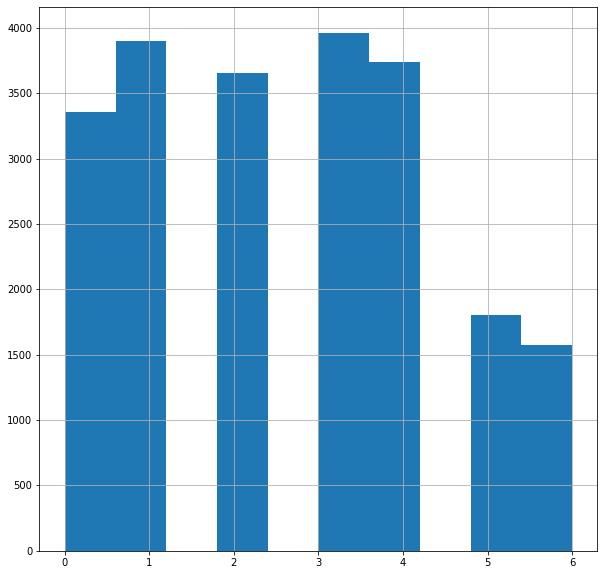

In [144]:
data['weekday'].hist(figsize=(10, 10) )
plt.show()

Риэлторы такие же люди как и мы, и работают в будни, по этому количетсво объявлений больше чем в выходные.

#### Месяц публикации объявления

In [145]:
data['month'].describe()

count    21989.000000
mean         6.400655
std          3.489936
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

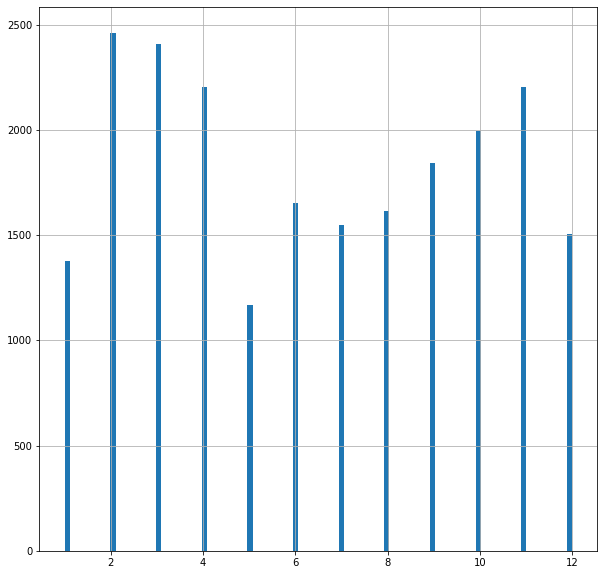

In [146]:
data['month'].hist(figsize=(10, 10) , bins=100)
plt.show()

Чаще всего публикуют объявления весной, хотя среднее значение говорит нам об июне.

#### Изучим, как быстро продавались квартиры 

In [147]:
data['days_exposition'].describe()

count    19128.000000
mean       173.328367
std        203.785384
min          3.000000
25%         44.000000
50%         93.000000
75%        224.000000
max       1200.000000
Name: days_exposition, dtype: float64

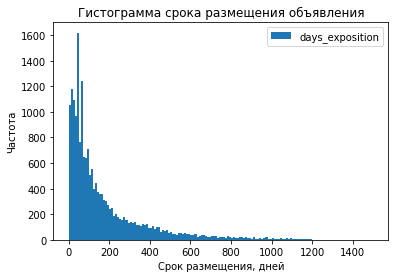

In [148]:
data.plot(y='days_exposition', 
          kind='hist',
          range=(0, 1500), 
          bins=150)
plt.title('Гистограмма срока размещения объявления')
plt.xlabel('Срок размещения, дней')
y = plt.ylabel('Частота')

Судя по гистограмме - мы имеем стандартное распределение Пуассона. Среднее значение - 93 дня, а медиана - 173. Из полученных данных имеет вывод: быстрая продажа до 44 дней, средняя продажа 93 дней, и так как у графика очень длинный "хвост" думаю что долгая продажа это все что больше 3й квантели, т.е. 224 дня.

#### Изучим зависимость полной цены от общей площади квартиры.

In [149]:
round (data['last_price'].corr(data['total_area']), 2)

0.76

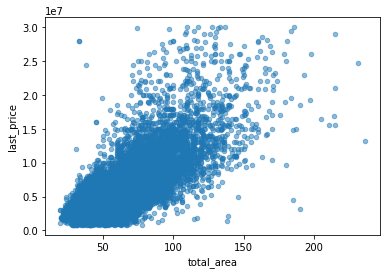

In [150]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5) 
plt.show();

Делаем вывод: зависимость согласно корреляции Пирсона - 0.76. То есть, чем больше площадь тем выше стоимость, что звучит логично.

#### Теперь изучим зависимость полной цены от жилой площади квартиры.



In [151]:
round (data['last_price'].corr(data['living_area']), 2)

0.65

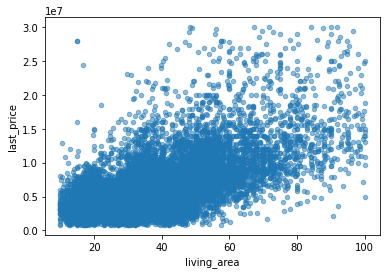

In [152]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5) 
plt.show()

Зависимость цены и жилой площади квартиры тоже есть, и она давольно большая.

#### Изучим зависимость полной цены от площади кухни.

In [153]:
round(data['kitchen_area'].corr(data['last_price']), 2)

0.54

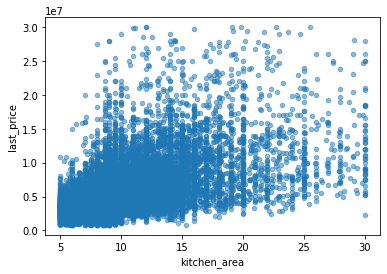

In [154]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5) 
plt.show()

Как и зависимость жилой площа, площадь кухни так же влияет на цену квартиры. 

#### Зависимость полной цены от количества комнат.

In [155]:
round(data['rooms'].corr(data['last_price']),2)

0.46

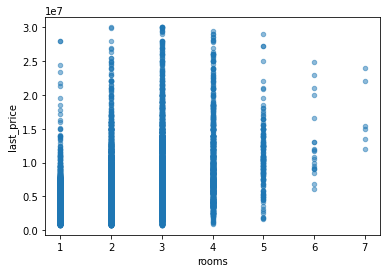

In [156]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5) 
plt.show()

Количество комнат чуть менее влияет на цену квартиры. Считаю что это связано с годом постройки дома. Напимер старые дома могут быть трехкомнатные но при этом иметь общую площать 60 квадратов. Когда в текущих современных домах 60 квадратов это обычно двухкомнатные квартиры, а трехкомнатные начинаются от 75-80 квадратов.

#### Изучим зависимость полной цены от типа этажа, но для этого надо переписать типы этажей в цифры, что бы можно было посчитать корреляцию

In [157]:
def new_new_floor(row):
    try:
        if row['floor'] == 1:
            return 0 
        if row['floor'] == row['floors_total']:
            return 2 
        return 1 
    except:
        return 'нет информации'
data['new_new_floor'] = data.apply(new_new_floor, axis = 1)  

In [158]:
round (data['new_new_floor'].corr(data['last_price']), 2)

0.05

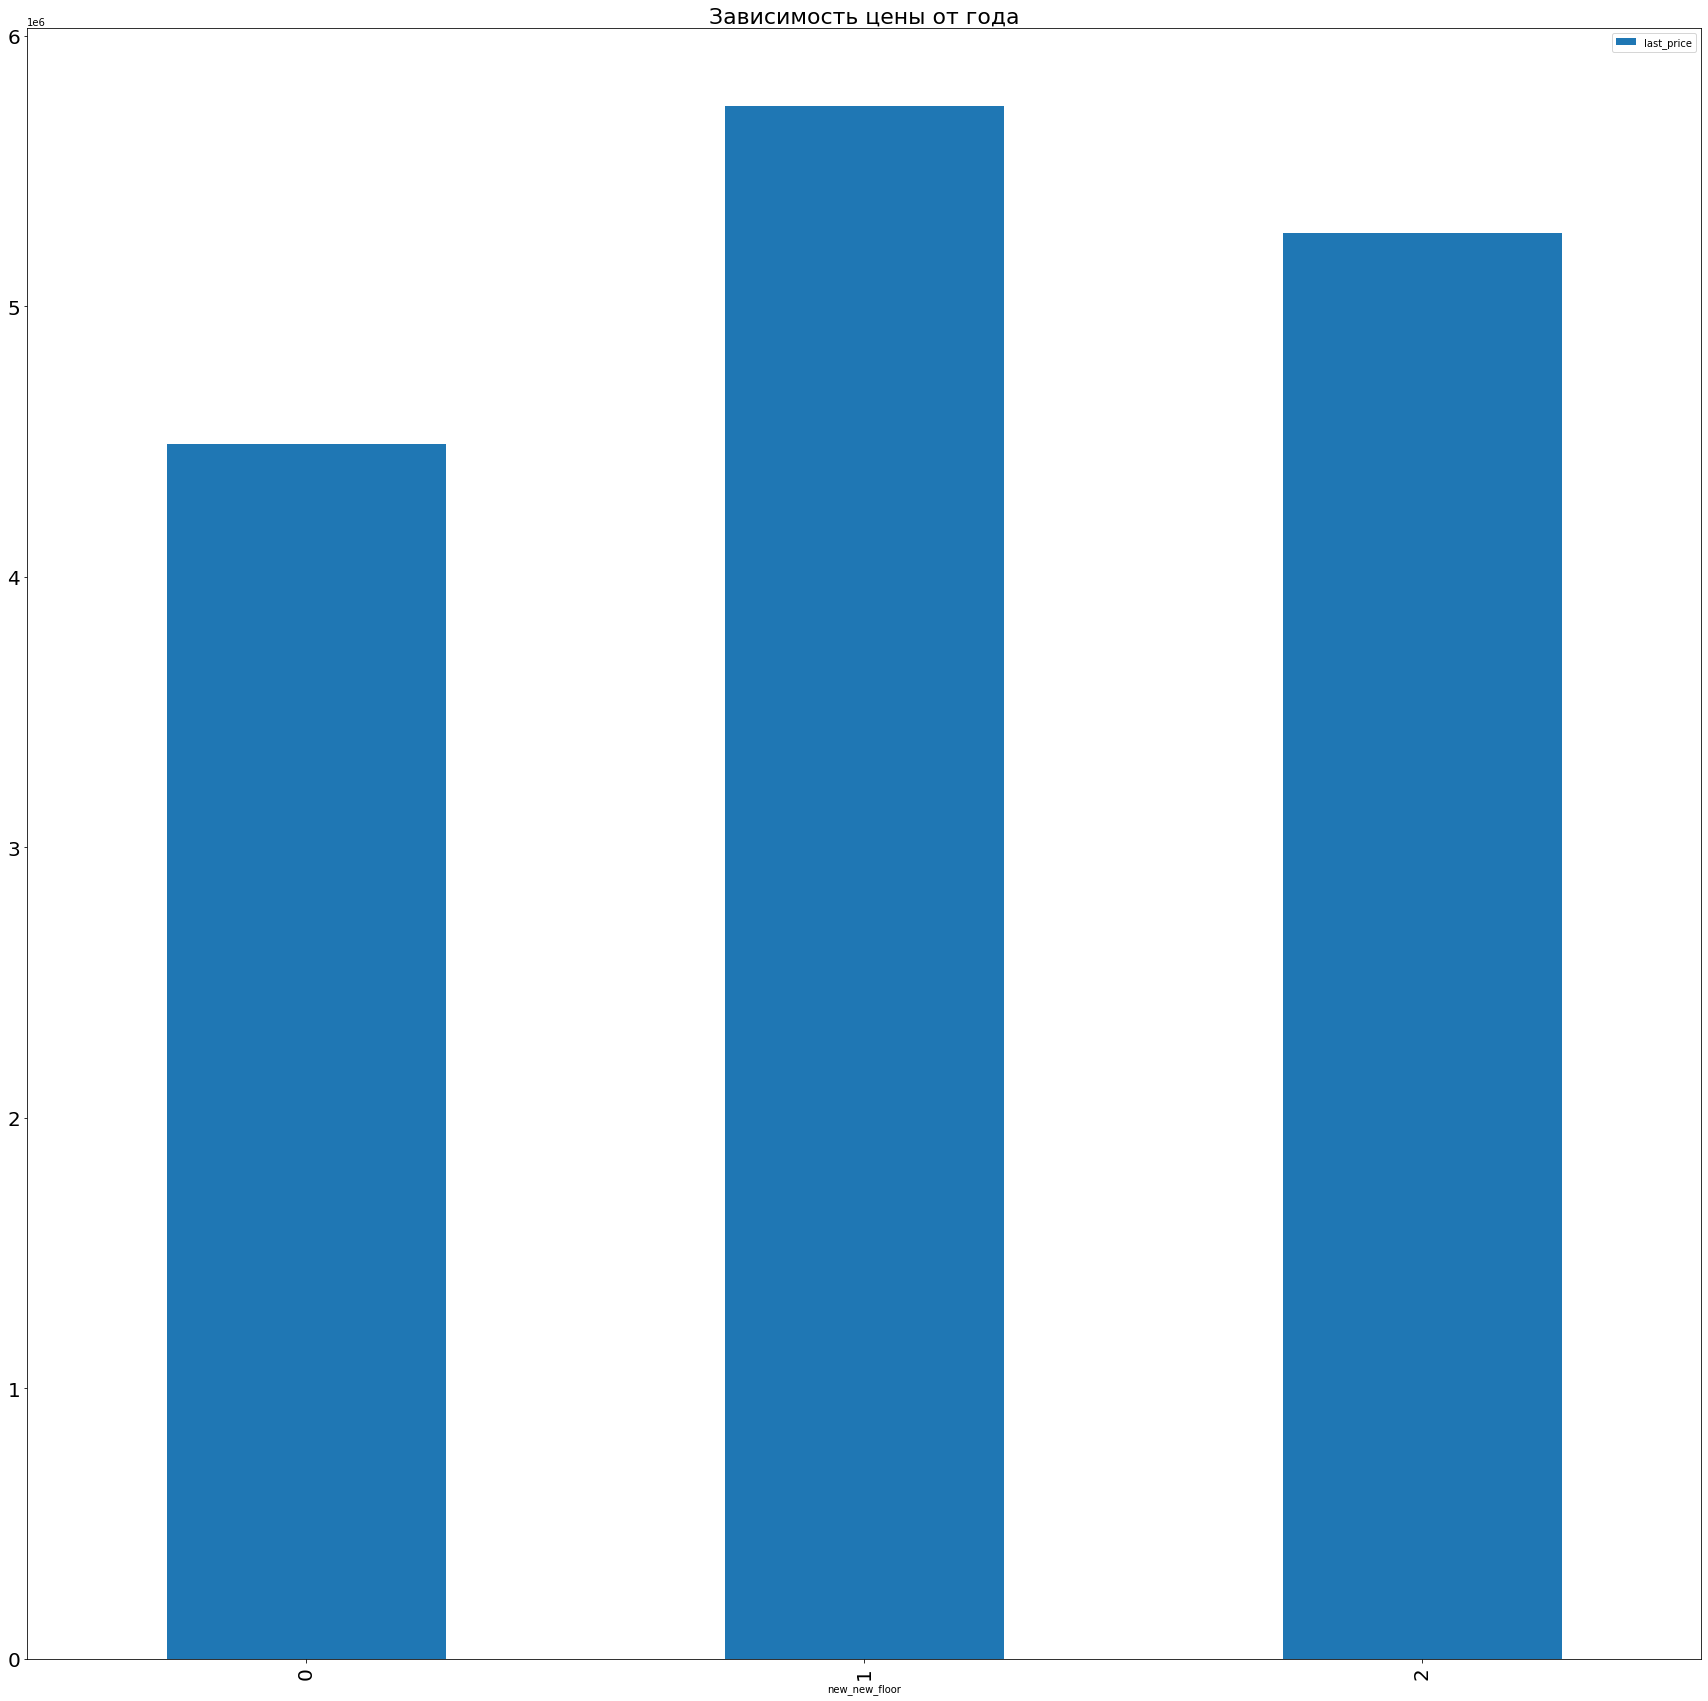

In [159]:
data.pivot_table(index='new_new_floor', values='last_price',).plot(kind = 'bar', figsize = (30,30), legend = True, fontsize = 20).set_title('Зависимость цены от года', fontsize = 22)
plt.show()

Из графика видим, что цена квартир на первом этаже чуть-чуть ниже чем на остальных, хотя прямой корреляции фактически нет.

#### Изучим зависимость полной цены от даты размещения: дня недели.

In [160]:
round(data['weekday'].corr(data['last_price']), 4)

-0.0141

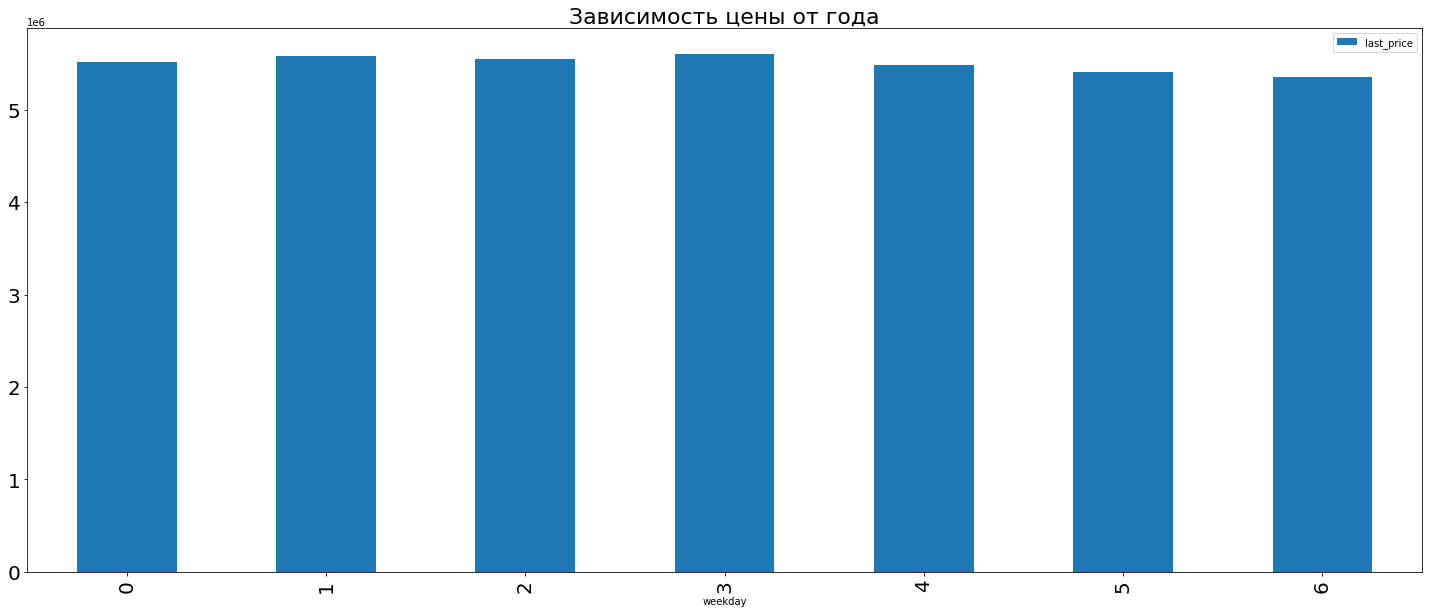

In [161]:

data.pivot_table(index='weekday', values='last_price',).plot(kind = 'bar', figsize = (25,10), legend = True, fontsize = 20).set_title('Зависимость цены от года', fontsize = 22)
plt.show()

Зависимость цены от публикации объявления в определенный день нет.

#### Изучим зависимость полной цены от даты размещения: месяца.

In [162]:
round (data['month'].corr(data['last_price']), 2)

0.01

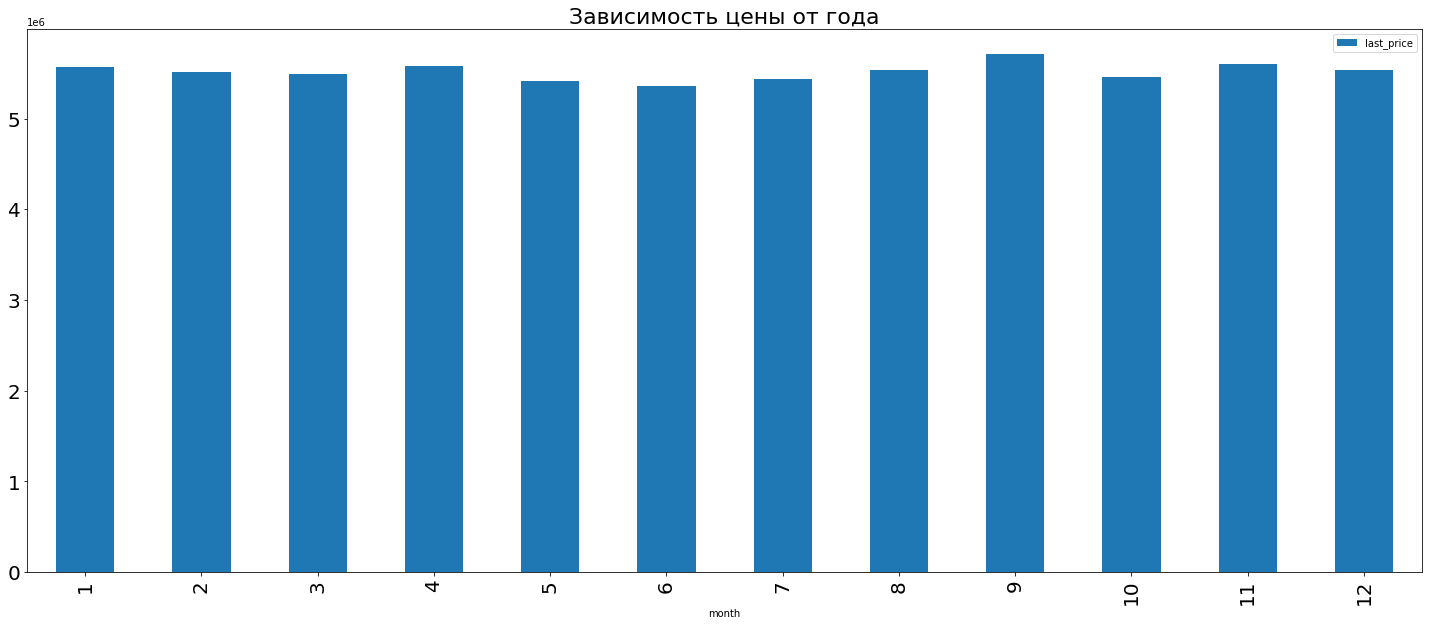

In [163]:
data.pivot_table(index='month', values='last_price',).plot(kind = 'bar', figsize = (25,10), legend = True, fontsize = 20).set_title('Зависимость цены от года', fontsize = 22)
plt.show()

Как и зависимости от дня, зависимости от месяца тоже фактически нет.

#### Изучим зависимость полной цены от даты размещения: года.

In [164]:
round (data['year'].corr(data['last_price']), 2)

-0.02

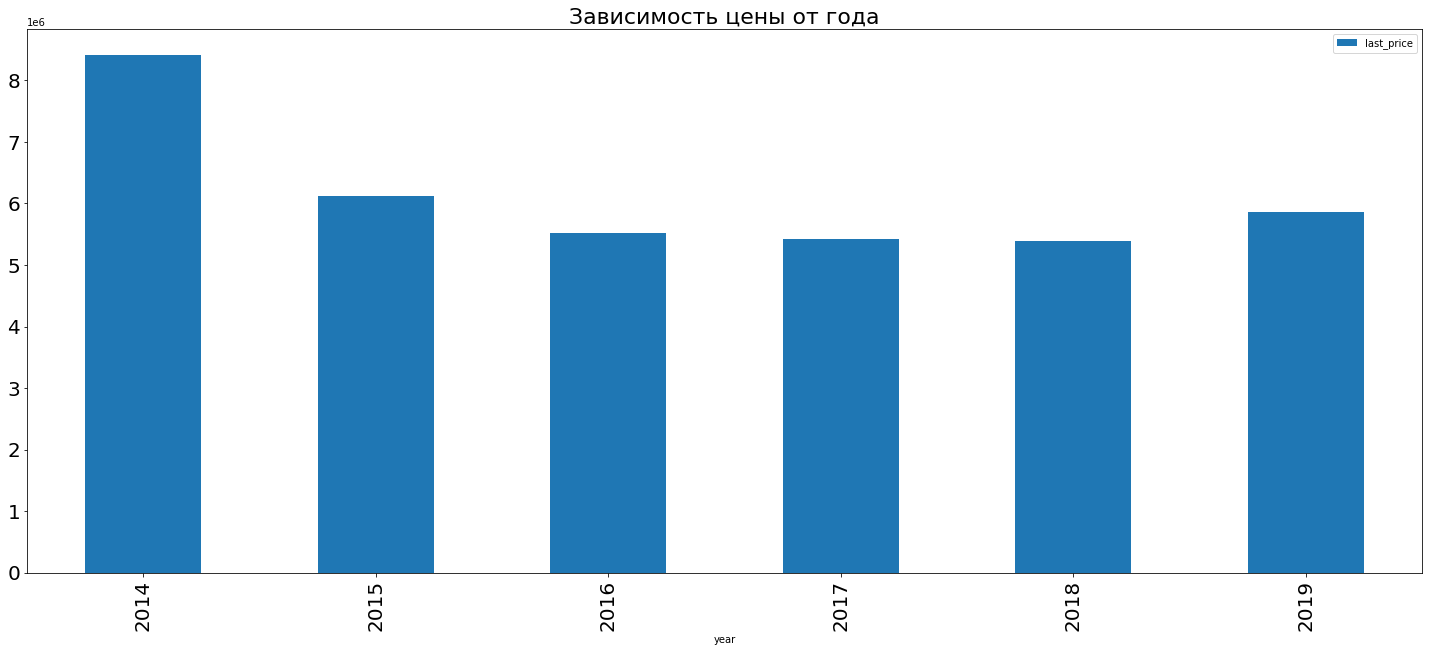

In [165]:
# data.plot(x='year', y='last_price', kind='bar', alpha=1) 
data.pivot_table(index='year', values='last_price',).plot(kind = 'bar', figsize = (25,10), legend = True, fontsize = 20).set_title('Зависимость цены от года', fontsize = 22)
plt.show()

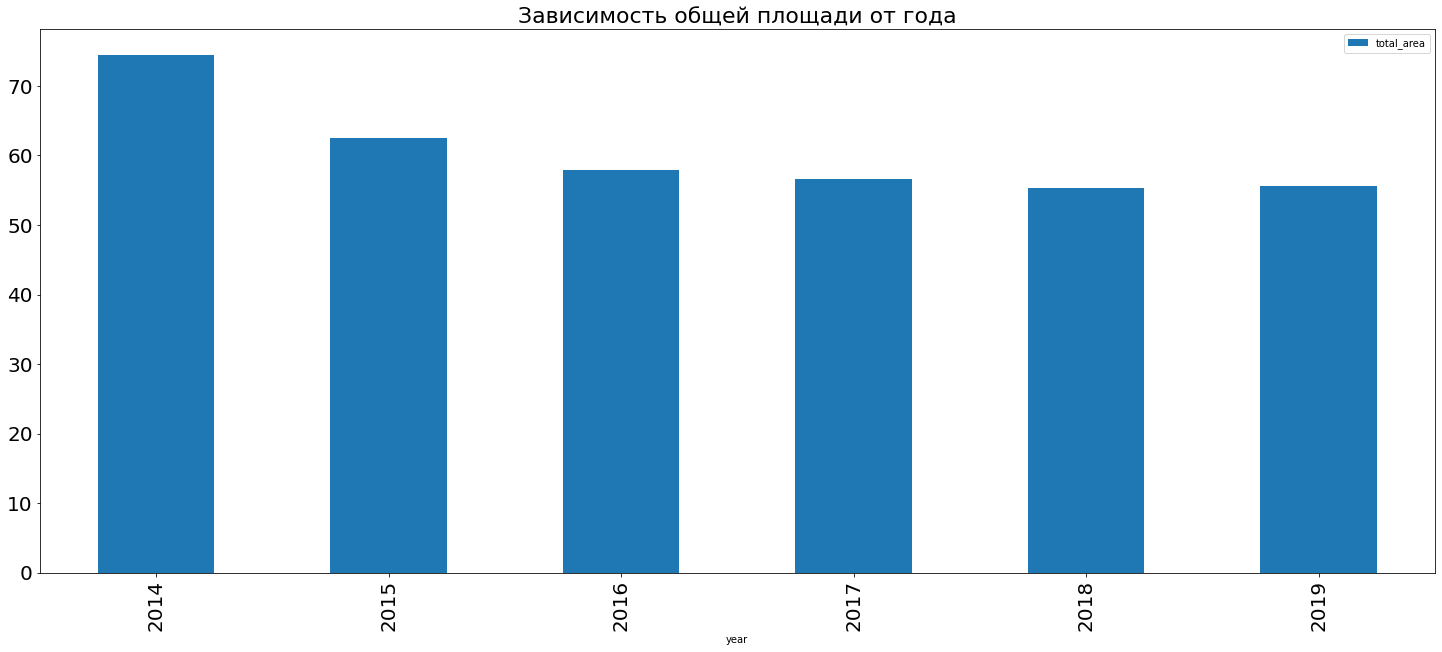

In [166]:
data.pivot_table(index='year', values='total_area').plot(kind = 'bar', 
            figsize = (25,10), legend = True, fontsize = 20).set_title('Зависимость общей площади от года', fontsize = 22);

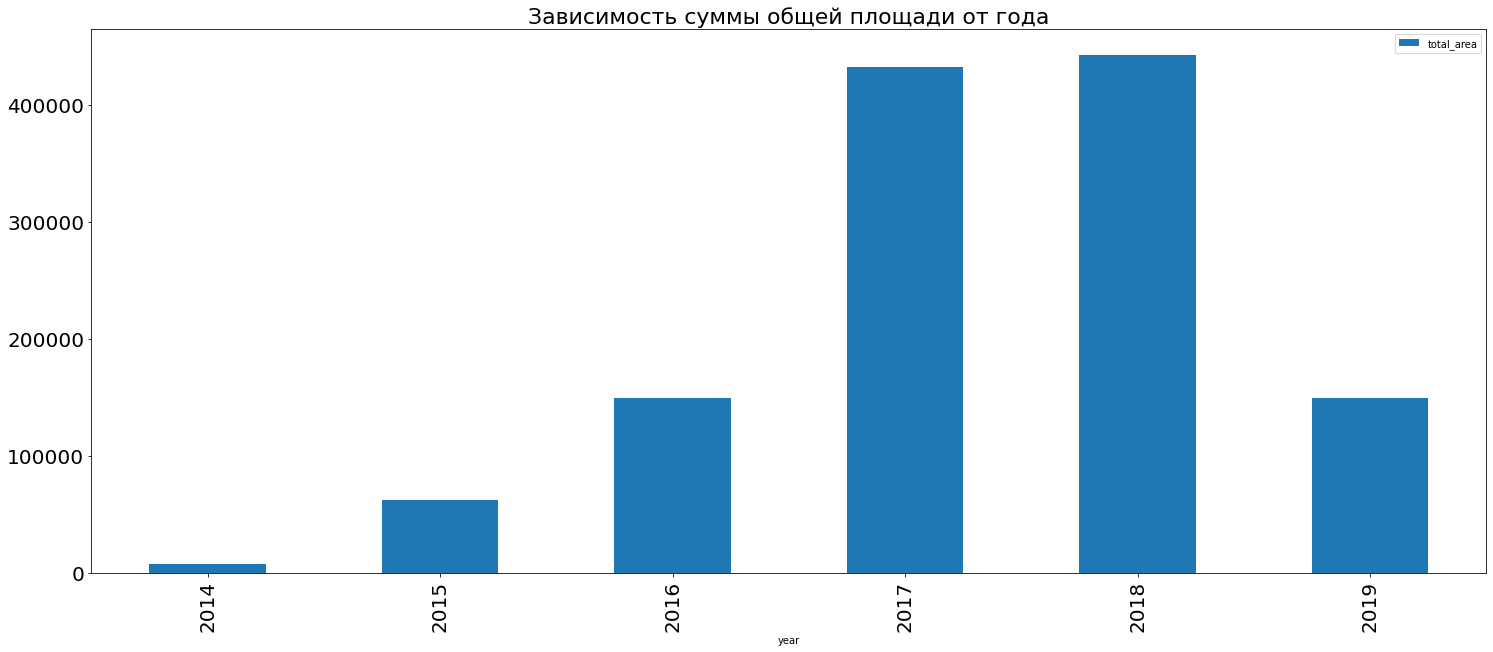

In [167]:
data.pivot_table(index='year', values='total_area', aggfunc=sum).plot(kind = 'bar', 
            figsize = (25,10), legend = True, fontsize = 20).set_title('Зависимость суммы общей площади от года', fontsize = 22);

Из построенных графиков видно, что с каждым годом количество квадратных метров увеличивается, а чем больше предложений тем ниже цена

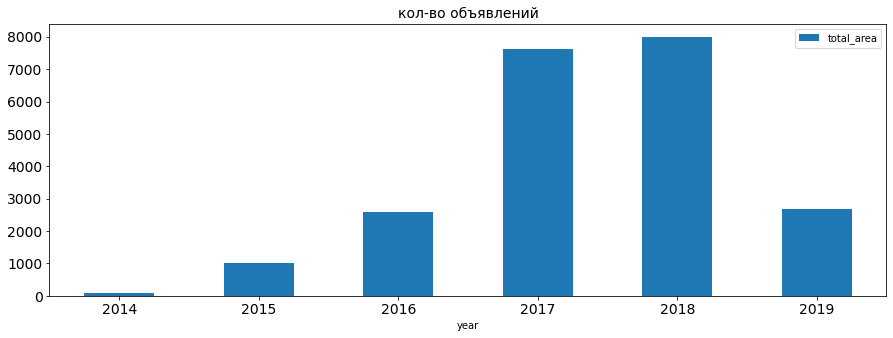

In [168]:
# check

data.pivot_table(index='year', values='total_area', aggfunc='count').plot(kind = 'bar', 
            figsize = (15,5), legend = True, fontsize = 14, rot=0).set_title('кол-во объявлений',
                                                                       fontsize = 14);

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

##### Для этого создадим список топ 10 населенных пунктов:

In [169]:
top10 = data['locality_name'].value_counts().head(10)
top10

Санкт-Петербург      14498
посёлок Мурино         512
посёлок Шушары         431
Всеволожск             386
Пушкин                 349
Колпино                336
посёлок Парголово      314
Гатчина                299
деревня Кудрово        281
Выборг                 225
Name: locality_name, dtype: int64

Самое большое количество объявлений в Санкт-Петербурге, а меньше всего объявлений в Выборге.

##### Теперь посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Text(0.5, 1.0, 'ТОП10')

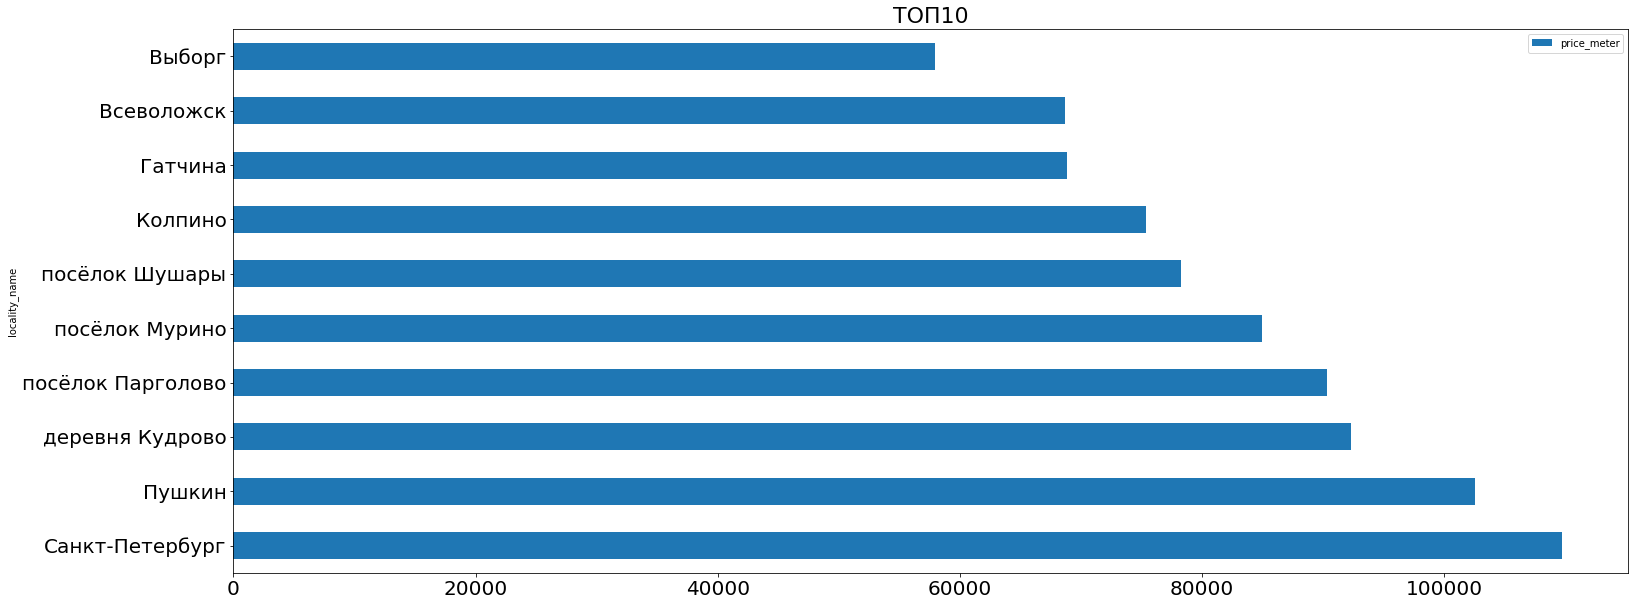

In [170]:
data.query('locality_name in (@top10.index)').pivot_table(values='price_meter', index='locality_name').sort_values('price_meter', ascending=False).round(decimals=2).plot(kind = 'barh', figsize = (25,10), legend = True, fontsize = 20).set_title('ТОП10', fontsize = 22)
                

Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, а самая низкая стоимость в Выборге.

Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.Это так же менее 1% от общего количества
Удалим строки без указания наименования локации

In [171]:
spb = data.query('locality_name == "Санкт-Петербург"') 
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,new_floor,city_centers_nearest_km,new_new_floor
12272,14,3200000,37.4,2018-02-28,1,2.50,9,20.0,4,0,...,0.0,NaN,104.0,85561.50,2,2,2018,другой,18.0,1
12295,7,4200000,36.0,2019-02-19,1,2.80,12,21.0,2,0,...,1.0,43.0,NaN,116666.67,1,2,2019,другой,12.0,1
12283,4,18326016,105.0,2019-04-16,3,2.70,13,38.1,3,0,...,0.0,NaN,NaN,174533.49,1,4,2019,другой,9.0,1
15546,8,5500000,50.0,2017-01-23,2,3.00,25,25.0,4,0,...,1.0,274.0,656.0,110000.00,0,1,2017,другой,17.0,1
15227,9,7250000,73.0,2017-10-24,3,2.70,15,44.0,3,0,...,2.0,692.0,15.0,99315.07,1,10,2017,другой,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,7,4500000,37.0,2016-10-16,1,NaN,24,19.0,10,0,...,2.0,268.0,484.0,121621.62,6,10,2016,другой,16.0,1
8878,13,5200000,35.5,2019-04-23,1,2.75,27,19.0,17,0,...,0.0,NaN,NaN,146478.87,1,4,2019,другой,15.0,1
8790,13,10500000,107.7,2017-07-05,3,2.75,16,59.7,14,0,...,0.0,NaN,97.0,97493.04,2,7,2017,другой,13.0,1
8789,6,3950000,42.1,2017-12-06,1,2.70,13,18.6,1,0,...,0.0,NaN,157.0,93824.23,2,12,2017,первый,14.0,0


In [172]:
spb_pivot_table = spb.pivot_table(index='city_centers_nearest_km', values='price_meter')
spb_pivot_table

,price_meter
city_centers_nearest_km,
0.0,116698.229000
1.0,143718.202877
2.0,129120.394649
3.0,115608.247320
4.0,124274.360536
5.0,131631.664060
6.0,130063.200081
7.0,130195.682870
8.0,122201.947146


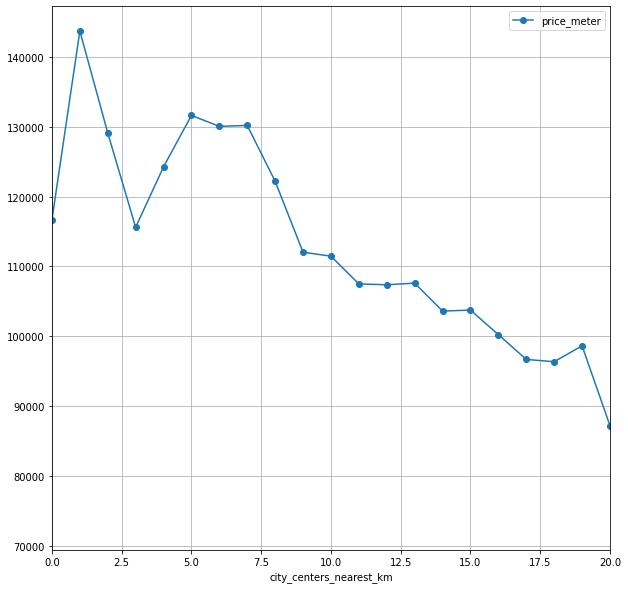

In [173]:
spb_pivot_table.plot(style='o-', grid=True, xlim=(0,20), figsize=(10, 10))
plt.show()

In [174]:
spb_pivot_table2 = spb.pivot_table(index='city_centers_nearest_km', values='last_price')
spb_pivot_table2

,last_price
city_centers_nearest_km,
0.0,8.798000e+06
1.0,1.110397e+07
2.0,1.023282e+07
3.0,9.009984e+06
4.0,9.587462e+06
5.0,1.010667e+07
6.0,8.865668e+06
7.0,8.774908e+06
8.0,8.356806e+06


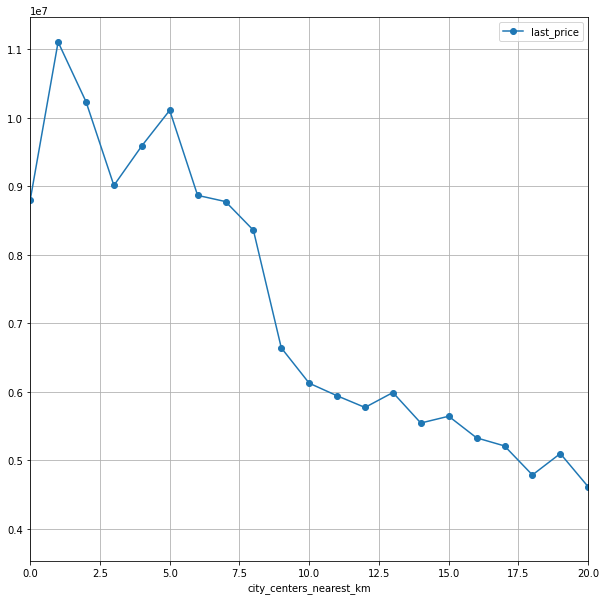

In [175]:
spb_pivot_table2.plot(style='o-', grid=True, xlim=(0,20), figsize=(10, 10))
plt.show()

* Сравнили как общая стоимость объектов зависит от расстояния до центра города и как цена за кв.м. зависит от расстояния до центра города. График по общей цене более сглаженный, что не удивительно, ведь, при продаже кварьир люди не высчитывают каждый квадратный метр, и общая цена за квартиру меняется чуть менее резко, чем цена за квадратный метр в зависимости от удаленности объекта от центра города. Согласно графику, после 7,5 км цена за кв.м. резко падает, значит, центра Питербурга - это 7,5 км и меньше.

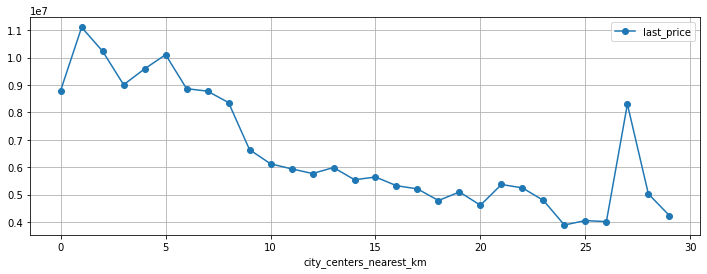

In [176]:
# check
spb_pivot_table2.plot(style='o-', grid=True, figsize=(12, 4));

In [177]:
spb.query('city_centers_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday,month,year,new_floor,city_centers_nearest_km,new_new_floor
5961,6,2250000,32.0,2018-02-27,1,NaN,2,16.5,2,0,...,0.0,NaN,178.0,70312.50,1,2,2018,последний,27.0,2
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,0,...,0.0,NaN,128.0,193918.92,1,11,2017,другой,27.0,1


In [178]:
spb.query('city_centers_nearest_km == 3| city_centers_nearest_km == 5').pivot_table(index=['city_centers_nearest_km', 'new_floor'], values='last_price',  aggfunc='count')


last_price
city_centers_nearest_km new_floor            
3.0                     другой            170
                        первый             51
                        последний          70
5.0                     другой            573
                        первый             72
                        последний         116

### Общий вывод

Мы обработали полученные данные - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы.
Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах.
Выявили что квартиры продаются в среднем за 96 дней. Если меньше 45 дней, то это быстро, если дольше 200 дней - это долго.
На стоимость квадратного метра квартиры больше всего влияют общая площадь, жилая площадь, этаж квартиры (чем выше - тем дороже), близость к центру.
Выявили центр горада - радиус до 7 км, там квартиры дороже всего, по мере удаления от центра уена за квартиры падает.
Наибольшую ценность из исходных данных представляли: суммарная площадь квартиры, количество комнат и цена. 
При анализе всех данных выбли обнаружены следющие признаки, которые влияют на цену квартиру, а именно:
количество квадратных метров жилья;
количество комнат.
Людей при покупке недвижимости, как правило, мало волнует наличие балкона, тип планировки и день подачи объявления.
Наибольшее количество объявлений о продаже недвижимости (за исключением Петербурга) в посёлках Мурино и Шушары. Разници при анализе квартир в центре и не в центре Санккт-Петербурга не обнаружено (кроме цены, и требований, чтобы квартира была именно в центре)